In [1]:
import pandas as pd
import plotly.express as px

In [2]:
FOLDER_PATH = '/Users/artemzmailov/Desktop/GiveMeSomeCredit/'
train_data_full = pd.read_csv(FOLDER_PATH + 'data/cs-training.csv', index_col = 0)
train_label_full = train_data_full['SeriousDlqin2yrs']
#test_data_full = pd.read_csv(FOLDER_PATH + 'data/cs-test.csv', index_col = 0)
#test_data_full = test_data_full.drop(columns = ['SeriousDlqin2yrs'])


In [3]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(
    train_data_full,
    train_label_full,
    test_size = 0.2, 
    stratify = train_label_full,
    shuffle = True,
    random_state = 42)


## Domain EDA

In [4]:
'''
Анализ всех данных на предмет логических закономерностей, нереалистичных значений исходя из логики предметной области

SeriousDlqin2yrs - Person experienced 90 days past due delinquency or worse (Y/N)

RevolvingUtilizationOfUnsecuredLines - Total balance on credit cards and personal lines of credit 
except real estate and no installment debt like car loans divided by the sum of credit limits (percentage)

age	- Age of borrower in years (integer)

NumberOfTime30-59DaysPastDueNotWorse - Number of times borrower has been 30-59 days past due but no worse in the last 2 years. (integer)

DebtRatio - Monthly debt payments, alimony,living costs divided by monthy gross income (percentage)

MonthlyIncome - Monthly income (real)

NumberOfOpenCreditLinesAndLoans	- Number of Open loans (installment like car loan or mortgage) 
and Lines of credit (e.g. credit cards) (integer)

NumberOfTimes90DaysLate	- Number of times borrower has been 90 days or more past due. (integer)

NumberRealEstateLoansOrLines - Number of mortgage and real estate loans including home equity lines of credit (integer)

NumberOfTime60-89DaysPastDueNotWorse - Number of times borrower has been 60-89 days past due but no worse in the last 2 years. (integer)

NumberOfDependents - Number of dependents in family excluding themselves (spouse, children etc.) (integer)
'''

'\nАнализ всех данных на предмет логических закономерностей, нереалистичных значений исходя из логики предметной области\n\nSeriousDlqin2yrs - Person experienced 90 days past due delinquency or worse (Y/N)\n\nRevolvingUtilizationOfUnsecuredLines - Total balance on credit cards and personal lines of credit \nexcept real estate and no installment debt like car loans divided by the sum of credit limits (percentage)\n\nage\t- Age of borrower in years (integer)\n\nNumberOfTime30-59DaysPastDueNotWorse - Number of times borrower has been 30-59 days past due but no worse in the last 2 years. (integer)\n\nDebtRatio - Monthly debt payments, alimony,living costs divided by monthy gross income (percentage)\n\nMonthlyIncome - Monthly income (real)\n\nNumberOfOpenCreditLinesAndLoans\t- Number of Open loans (installment like car loan or mortgage) \nand Lines of credit (e.g. credit cards) (integer)\n\nNumberOfTimes90DaysLate\t- Number of times borrower has been 90 days or more past due. (integer)\n\nN

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 57837 to 80531
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      120000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  120000 non-null  float64
 2   age                                   120000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  120000 non-null  int64  
 4   DebtRatio                             120000 non-null  float64
 5   MonthlyIncome                         96325 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       120000 non-null  int64  
 7   NumberOfTimes90DaysLate               120000 non-null  int64  
 8   NumberRealEstateLoansOrLines          120000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  120000 non-null  int64  
 10  NumberOfDependents                    116872 non-null  float64
dtypes:

In [6]:
train_data.describe()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     120000.000000                         120000.000000  120000.000000   
mean           0.066842                              6.128916      52.287842   
std            0.249749                            253.361490      14.771274   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029593      41.000000   
50%            0.000000                              0.153318      52.000000   
75%            0.000000                              0.557832      63.000000   
max            1.000000                          50708.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         120000.000000  120000.000000   9.632500e+04   
mean                               0.420075     352.271245   6.651507e+03   
std                                4.182138    2093.709509   1.454118e+04   
min                                0.000000       0.000000   0.000000e+00   
25%                                0.000000       0.175330   3.400000e+03   
50%                                0.000000       0.366194   5.390000e+03   
75%                                0.000000       0.860833   8.238000e+03   
max                               98.000000  329664.000000   3.008750e+06   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
count                    120000.000000            120000.000000   
mean                          8.465692                 0.264942   
std                           5.161693                 4.158242   
min                           0.000000                 0.000000   
25%                           5.000000                 0.000000   
50%                           8.000000                 0.000000   
75%                          11.000000                 0.000000   
max                          58.000000                98.000000   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
count                 120000.000000                         120000.000000   
mean                       1.018167                              0.239858   
std                        1.133055                              4.144569   
min                        0.000000                              0.000000   
25%                        0.000000                              0.000000   
50%                        1.000000                              0.000000   
75%                        2.000000                              0.000000   
max                       54.000000                             98.000000   

       NumberOfDependents  
count       116872.000000  
mean             0.757333  
std              1.115337  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              1.000000  
max             20.000000

In [7]:
train_data.nunique()

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    100929
age                                         84
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                                93157
MonthlyIncome                            12678
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64

In [8]:
def hist_print(data, graph):
    for col in data.columns:
        if col != 'SeriousDlqin2yrs':
            fig = graph(data[col])
            print(f'col: {col}, min: {data[col].min()}, max: {data[col].max()}')
            fig.show()

In [9]:
# hist_print(train_data, px.histogram)

In [10]:
'''
Полезные инсайты из всех данных:
RevolvingUtilizationOfUnsecuredLines - имеет запредельно высокий максимум, вероятно аномалия

age - возраст более 80 и даже 100 лет, в большинстве стран мира кредиты дают до 70-80 лет, 
всё что выше вероятно стоит либо отдать на ручной разбор (кредит под специальные условия) или автоотказ

NumberOfTime30-59DaysPastDueNotWorse - странные значения 96 и 98, 

DebtRatio - нереалистичный максимум = 329664, а также нереалистичный правый хвост, 
вряд ли отношение платежей к доходу может быть более чем в 100 раз больше

MonthlyIncome - есть люди с очень высоким доходом
NumberOfOpenCreditLinesAndLoans - длинный правый хвост, но +- непрерывный
NumberOfTimes90DaysLate - снова значения 96 и 98
NumberRealEstateLoansOrLines - длинный правый хвост, но +- непрерывный
NumberOfTime60-89DaysPastDueNotWorse - снова значения 96 и 98
NumberOfDependents - странный максимум в 20, в семье заёмщика 20 человек?

В NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate повторяются значения 96, 98

'''

'\nПолезные инсайты из всех данных:\nRevolvingUtilizationOfUnsecuredLines - имеет запредельно высокий максимум, вероятно аномалия\n\nage - возраст более 80 и даже 100 лет, в большинстве стран мира кредиты дают до 70-80 лет, \nвсё что выше вероятно стоит либо отдать на ручной разбор (кредит под специальные условия) или автоотказ\n\nNumberOfTime30-59DaysPastDueNotWorse - странные значения 96 и 98, \n\nDebtRatio - нереалистичный максимум = 329664, а также нереалистичный правый хвост, \nвряд ли отношение платежей к доходу может быть более чем в 100 раз больше\n\nMonthlyIncome - есть люди с очень высоким доходом\nNumberOfOpenCreditLinesAndLoans - длинный правый хвост, но +- непрерывный\nNumberOfTimes90DaysLate - снова значения 96 и 98\nNumberRealEstateLoansOrLines - длинный правый хвост, но +- непрерывный\nNumberOfTime60-89DaysPastDueNotWorse - снова значения 96 и 98\nNumberOfDependents - странный максимум в 20, в семье заёмщика 20 человек?\n\nВ NumberOfTime30-59DaysPastDueNotWorse, NumberO

In [11]:
train_data.corrwith(train_label).sort_values(ascending = False)

SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.125012
NumberOfTimes90DaysLate                 0.117131
NumberOfTime60-89DaysPastDueNotWorse    0.102294
NumberOfDependents                      0.045636
RevolvingUtilizationOfUnsecuredLines   -0.000896
NumberRealEstateLoansOrLines           -0.007560
DebtRatio                              -0.008662
MonthlyIncome                          -0.018634
NumberOfOpenCreditLinesAndLoans        -0.032654
age                                    -0.112322
dtype: float64

In [12]:
print(train_data_full['SeriousDlqin2yrs'].value_counts())
print('pos %: ',sum(train_data_full['SeriousDlqin2yrs']) / len(train_data_full['SeriousDlqin2yrs']))

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64
pos %:  0.06684


In [13]:
print(train_data_full['SeriousDlqin2yrs'].value_counts())
print('pos %: ',sum(train_data_full['SeriousDlqin2yrs']) / len(train_data_full['SeriousDlqin2yrs']))

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64
pos %:  0.06684


## Обработка пропусков

In [14]:
train_data.isna().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.197292
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026067
dtype: float64

In [15]:
print(train_data['NumberOfDependents'].isna().sum())

3128


### Пропуски NumberOfDependents

In [16]:
train_data['NumberOfDependents'].unique()

array([ 2.,  0.,  3., nan,  1.,  4.,  7.,  6.,  5.,  9.,  8., 10., 13.,
       20.])

In [17]:
train_data['NumberOfDependents'].value_counts()

NumberOfDependents
0.0     69494
1.0     21118
2.0     15600
3.0      7559
4.0      2315
5.0       587
6.0       130
7.0        41
8.0        18
10.0        5
9.0         3
13.0        1
20.0        1
Name: count, dtype: int64

In [18]:
train_data.drop(columns = ['NumberOfDependents']).corrwith(train_data['NumberOfDependents']).sort_values(ascending = False)

NumberRealEstateLoansOrLines            0.122767
NumberOfOpenCreditLinesAndLoans         0.064345
MonthlyIncome                           0.062118
SeriousDlqin2yrs                        0.045636
RevolvingUtilizationOfUnsecuredLines    0.002224
NumberOfTime30-59DaysPastDueNotWorse   -0.002710
NumberOfTimes90DaysLate                -0.010068
NumberOfTime60-89DaysPastDueNotWorse   -0.011049
DebtRatio                              -0.037568
age                                    -0.212655
dtype: float64

In [19]:
for value, cnt in train_data['NumberOfDependents'].value_counts().items():
    print(value, cnt)
    pos = train_data.loc[train_data['NumberOfDependents'] == value, 'SeriousDlqin2yrs'].mean()
    neg = 1 - pos
    print(f'NumberOfDependents: {value}, amount: {cnt}, pos: {pos:.4f}, neg: {neg:.4f}')

0.0 69494
NumberOfDependents: 0.0, amount: 69494, pos: 0.0585, neg: 0.9415
1.0 21118
NumberOfDependents: 1.0, amount: 21118, pos: 0.0742, neg: 0.9258
2.0 15600
NumberOfDependents: 2.0, amount: 15600, pos: 0.0814, neg: 0.9186
3.0 7559
NumberOfDependents: 3.0, amount: 7559, pos: 0.0882, neg: 0.9118
4.0 2315
NumberOfDependents: 4.0, amount: 2315, pos: 0.0989, neg: 0.9011
5.0 587
NumberOfDependents: 5.0, amount: 587, pos: 0.0971, neg: 0.9029
6.0 130
NumberOfDependents: 6.0, amount: 130, pos: 0.1385, neg: 0.8615
7.0 41
NumberOfDependents: 7.0, amount: 41, pos: 0.0976, neg: 0.9024
8.0 18
NumberOfDependents: 8.0, amount: 18, pos: 0.1111, neg: 0.8889
10.0 5
NumberOfDependents: 10.0, amount: 5, pos: 0.0000, neg: 1.0000
9.0 3
NumberOfDependents: 9.0, amount: 3, pos: 0.0000, neg: 1.0000
13.0 1
NumberOfDependents: 13.0, amount: 1, pos: 0.0000, neg: 1.0000
20.0 1
NumberOfDependents: 20.0, amount: 1, pos: 0.0000, neg: 1.0000


In [20]:
train_data.loc[train_data['NumberOfDependents'].isna(), 'SeriousDlqin2yrs'].mean()

0.04411764705882353

In [21]:
'''
Доля положительного таргета ниже чем у 0-вого значения, 
с ростом числа иждивенцев доля положительного таргета только растёт, потому заполняем пропуски нулями.
'''

train_data['NumberOfDependents'] = train_data['NumberOfDependents'].fillna(value = 0)
# больше 10 иждивенцев - очень редкий случай, 10 - как понятное круглое значение для обозначения очень многодетной семьи
train_data['NumberOfDependents'] = train_data['NumberOfDependents'].clip(0,10).copy()

### Пропуски MonthlyIncome

In [22]:
print(train_data['SeriousDlqin2yrs'][train_data['MonthlyIncome'].isna()].value_counts())
print('pos:', train_data.loc[train_data['MonthlyIncome'].isna(), 'SeriousDlqin2yrs'].mean())

SeriousDlqin2yrs
0    22356
1     1319
Name: count, dtype: int64
pos: 0.05571277719112988


In [23]:
print(train_data['MonthlyIncome'].isna().sum())

23675


In [24]:
sum(train_data['MonthlyIncome'] == 0)

1322

In [25]:
def interval_check(dataframe, feature_name, bins):
    df = dataframe[['SeriousDlqin2yrs', feature_name]]
    for i in range(len(bins)-1):
        low = bins[i]
        up = bins[i+1]
        df_between = df[(df[feature_name] >= low) & (df[feature_name] < up)]
        
        print(f'interval: {low}-{up}')
        print(f'amount: {len(df_between)}')
        if len(df_between) != 0:
            pos = df_between['SeriousDlqin2yrs'].sum() / len(df_between)
            neg = 1 - pos
            print(f'pos: {pos}, neg: {neg}')
        else:
            print('no pos, no neg')

bins = [0,1,10,100,1000,3000,5000,8000,10000,12000,14000,16000]
interval_check(train_data, 'MonthlyIncome', bins = bins)

interval: 0-1
amount: 1322
pos: 0.0416036308623298, neg: 0.9583963691376702
interval: 1-10
amount: 508
pos: 0.025590551181102362, neg: 0.9744094488188977
interval: 10-100
amount: 21
pos: 0.0, neg: 1.0
interval: 100-1000
amount: 1710
pos: 0.06257309941520468, neg: 0.9374269005847953
interval: 1000-3000
amount: 15162
pos: 0.09945917425141802, neg: 0.900540825748582
interval: 3000-5000
amount: 23955
pos: 0.08495094969734919, neg: 0.9150490503026508
interval: 5000-8000
amount: 27578
pos: 0.06396402929871636, neg: 0.9360359707012836
interval: 8000-10000
amount: 10273
pos: 0.05159155066679646, neg: 0.9484084493332036
interval: 10000-12000
amount: 6797
pos: 0.040459026040900396, neg: 0.9595409739590997
interval: 12000-14000
amount: 3468
pos: 0.04181084198385236, neg: 0.9581891580161477
interval: 14000-16000
amount: 1896
pos: 0.049578059071729956, neg: 0.95042194092827


In [26]:
'''
Простая бизнес-логика, если по какой-то причине не указан доход, странно рисовать человеку какой-то доход, 
который может быть больше реального и тем самым повышать шанс на одобрение
при этом число людей с неуказанным доходом велико, а число людей с нулевым доходом всего 1322,
потому выполняется заполнение пропуском нулем и создание признака-флага для лиц с неуказанным доходом
'''
train_data['MonthlyIncomeIsMissing'] = 0
train_data.loc[train_data['MonthlyIncome'].isna(), 'MonthlyIncomeIsMissing'] = 1
train_data['MonthlyIncome'] = train_data['MonthlyIncome'].fillna(value = 0)
#test_data['MonthlyIncome'] = test_data['MonthlyIncome'].fillna(value = 0)


In [27]:
print(train_data_full['SeriousDlqin2yrs'].value_counts())
print('pos %: ',sum(train_data_full['SeriousDlqin2yrs']) / len(train_data_full['SeriousDlqin2yrs']))

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64
pos %:  0.06684


<Axes: >

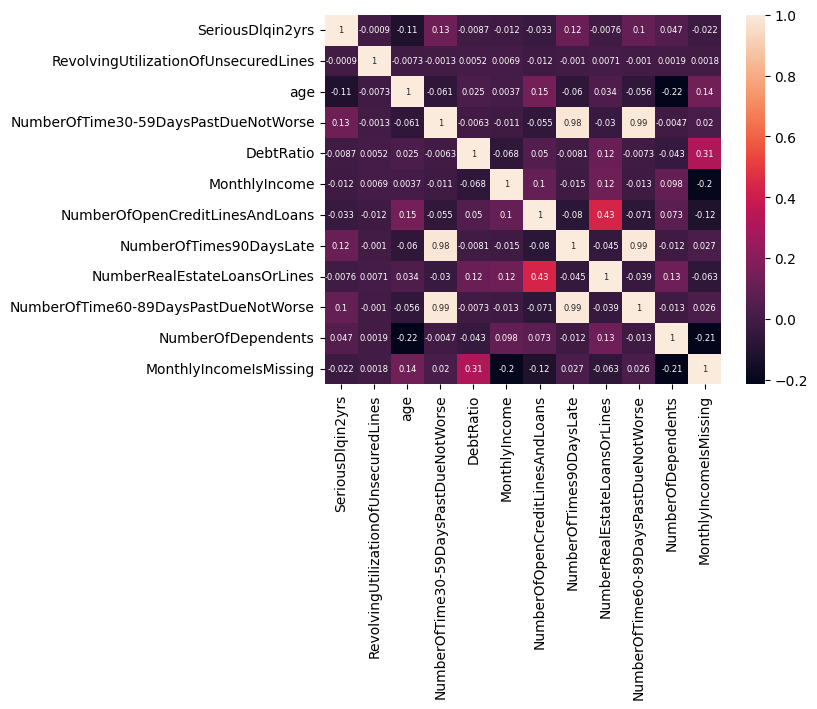

In [28]:
import seaborn as sns
sns.heatmap(train_data.corr(), annot = True,annot_kws={'size': 6})

# Outliers

In [29]:
def iqr_bound_detection(data, column, multiplier = 1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

def iqr_detection(data):
    col_outliers = dict()
    for col in data.columns:
        lower_bound, upper_bound = iqr_bound_detection(data, col)
        outliers_low = data[col][data[col] < lower_bound]
        outliers_up = data[col][data[col] > upper_bound]
        outliers_len = len(outliers_low) + len(outliers_up)
        col_outliers[col] = [outliers_low, outliers_up,[len(outliers_low),len(outliers_up)]]
    return col_outliers

def interval_check(dataframe, feature_name, bins):
    df = dataframe[['SeriousDlqin2yrs', feature_name]]
    for i in range(len(bins)-1):
        low = bins[i]
        up = bins[i+1]
        df_between = df[(df[feature_name] >= low) & (df[feature_name] < up)]
        
        print(f'interval: {low}-{up}')
        print(f'amount: {len(df_between)}')
        if len(df_between) != 0:
            pos = df_between['SeriousDlqin2yrs'].sum() / len(df_between)
            neg = 1 - pos
            print(f'pos: {pos}, neg: {neg}')
        else:
            print('no pos, no neg')

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 57837 to 80531
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      120000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  120000 non-null  float64
 2   age                                   120000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  120000 non-null  int64  
 4   DebtRatio                             120000 non-null  float64
 5   MonthlyIncome                         120000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       120000 non-null  int64  
 7   NumberOfTimes90DaysLate               120000 non-null  int64  
 8   NumberRealEstateLoansOrLines          120000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  120000 non-null  int64  
 10  NumberOfDependents                    120000 non-null  float64
 11  Mo

In [31]:
train_data.describe()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     120000.000000                         120000.000000  120000.000000   
mean           0.066842                              6.128916      52.287842   
std            0.249749                            253.361490      14.771274   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029593      41.000000   
50%            0.000000                              0.153318      52.000000   
75%            0.000000                              0.557832      63.000000   
max            1.000000                          50708.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         120000.000000  120000.000000   1.200000e+05   
mean                               0.420075     352.271245   5.339220e+03   
std                                4.182138    2093.709509   1.329420e+04   
min                                0.000000       0.000000   0.000000e+00   
25%                                0.000000       0.175330   1.556750e+03   
50%                                0.000000       0.366194   4.350000e+03   
75%                                0.000000       0.860833   7.400000e+03   
max                               98.000000  329664.000000   3.008750e+06   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
count                    120000.000000            120000.000000   
mean                          8.465692                 0.264942   
std                           5.161693                 4.158242   
min                           0.000000                 0.000000   
25%                           5.000000                 0.000000   
50%                           8.000000                 0.000000   
75%                          11.000000                 0.000000   
max                          58.000000                98.000000   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
count                 120000.000000                         120000.000000   
mean                       1.018167                              0.239858   
std                        1.133055                              4.144569   
min                        0.000000                              0.000000   
25%                        0.000000                              0.000000   
50%                        1.000000                              0.000000   
75%                        2.000000                              0.000000   
max                       54.000000                             98.000000   

       NumberOfDependents  MonthlyIncomeIsMissing  
count       120000.000000           120000.000000  
mean             0.737483                0.197292  
std              1.105982                0.397956  
min              0.000000                0.000000  
25%              0.000000                0.000000  
50%              0.000000                0.000000  
75%              1.000000                0.000000  
max             10.000000                1.000000

In [32]:
iqr_detection(pd.DataFrame(train_data))

{'SeriousDlqin2yrs': [Series([], Name: SeriousDlqin2yrs, dtype: int64),
  81398     1
  138726    1
  57405     1
  133381    1
  104069    1
           ..
  63237     1
  95071     1
  85926     1
  114153    1
  95677     1
  Name: SeriousDlqin2yrs, Length: 8021, dtype: int64,
  [0, 8021]],
 'RevolvingUtilizationOfUnsecuredLines': [Series([], Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64),
  40469        2.239601
  20957        1.540707
  61382     1851.000000
  92498        2.279503
  115305       1.624550
               ...     
  105464       1.684631
  127361       1.357939
  38769        1.407960
  123855    1713.000000
  96676        1.856058
  Name: RevolvingUtilizationOfUnsecuredLines, Length: 617, dtype: float64,
  [0, 617]],
 'age': [65696    0
  Name: age, dtype: int64,
  28871      97
  51702      98
  57968     103
  92719      99
  2923       99
  9871       98
  91971      98
  78708      99
  437        97
  147652     97
  93814     101
  25562     102
 

In [33]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
def outliers_check(data, col):
    lower_bound, upper_bound = iqr_bound_detection(data,col)
    print(f'lower_bound: {lower_bound}, upper_bound: {upper_bound}')
    outliers_low,outliers_up,outliers_length = iqr_detection(data[col].to_frame())[col]
    total_outliers = pd.concat([outliers_low,outliers_up], axis = 0)
    non_outliers = data[col].drop(index = total_outliers.index)
    
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(x = outliers_low.index,
                   y = outliers_low.values,
                   mode = 'markers',
                   marker = {'color':'blue', 'size': 5, 'opacity': 0.5},
                   name = 'Нижние Выбросы')
    )
    fig.add_trace(
        go.Scatter(x = outliers_up.index,
                   y = outliers_up.values,
                   mode = 'markers',
                   marker = {'color':'red', 'size': 5, 'opacity': 0.5},
                   name = 'Верхние Выбросы')
    )
    fig.add_hline(y = lower_bound, line_color = 'black', annotation_text = 'Нижняя Граница')
    fig.add_hline(y = upper_bound, line_color = 'brown', annotation_text = 'Верхняя Граница')
    fig.show()
    
    total_positive_outliers = train_label.loc[total_outliers.index].sum()
    total_negative_outliers = len(total_outliers) - total_positive_outliers

    cages = [0,0.25,0.5,0.75,1]
    for i,cage in enumerate(cages):
        fig = make_subplots(rows = 1,
                            cols = 2,
                            specs=[[{"type": "pie"}, {"type": "pie"}]],
                            subplot_titles = [f'Выбросы на отдалении в {cage*100}% от нижней границы',
                                              f'Выбросы на отдалении в {cage*100}% от верхней границы'])
        
        low_cage = outliers_low[outliers_low < lower_bound - abs(lower_bound) * cage]
        up_cage = outliers_up[(upper_bound + abs(upper_bound) * cage < outliers_up)]
            
        positive_outliers_low = train_label.loc[low_cage.index].sum()
        negative_outliers_low = len(low_cage) - positive_outliers_low

        positive_outliers_up = train_label.loc[up_cage.index].sum()
        negative_outliers_up = len(up_cage) - positive_outliers_up
        print(positive_outliers_low, positive_outliers_up)
        fig.add_trace(go.Pie(values = [positive_outliers_low, negative_outliers_low],labels = ['1','0']), row = 1, col = 1)
        fig.add_trace(go.Pie(values = [positive_outliers_up, negative_outliers_up],labels = ['1','0']), row = 1, col = 2)

        fig.update_annotations(yshift = 30)
        fig.show()
                        
#outliers_check(train_data, 'RevolvingUtilizationOfUnsecuredLines')

## Outliers RevolvingUtilizationOfUnsecuredLines 

lower_bound: -0.7627655104999999, upper_bound: 1.3501902934999999


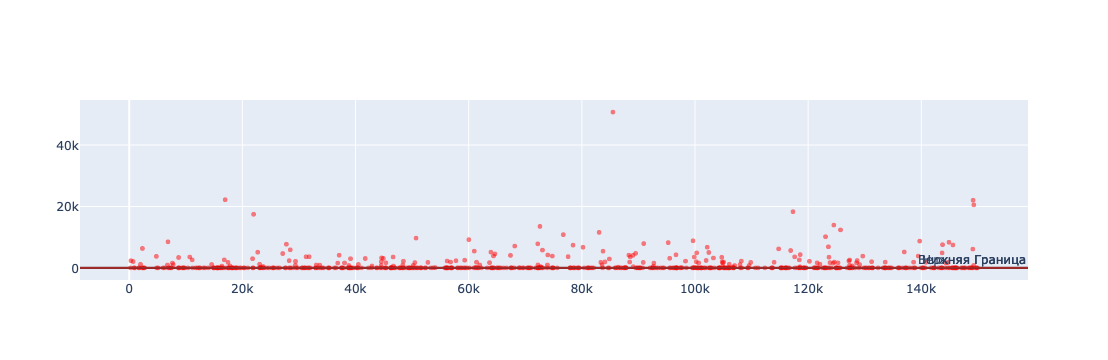

0 198


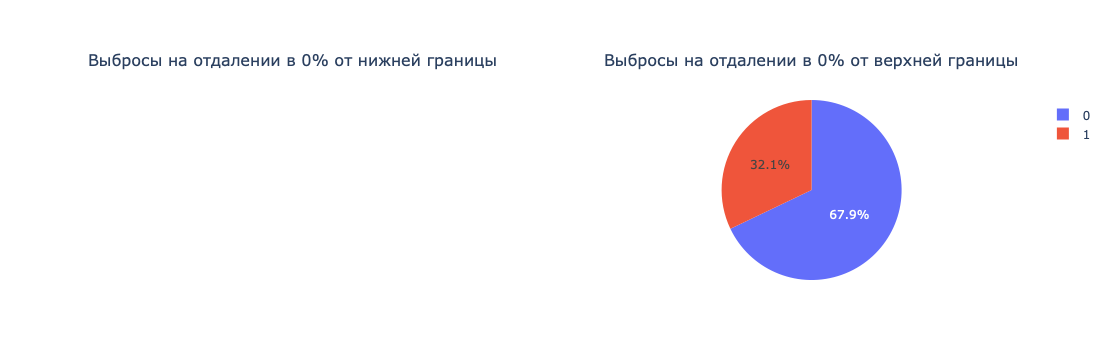

0 93


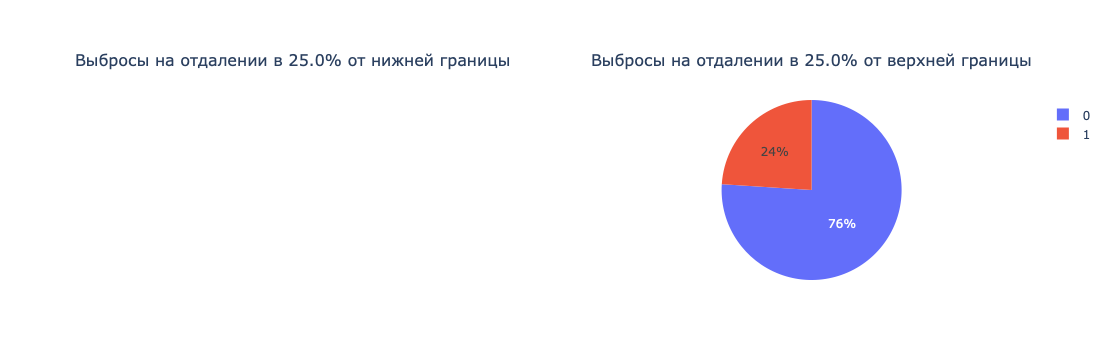

0 44


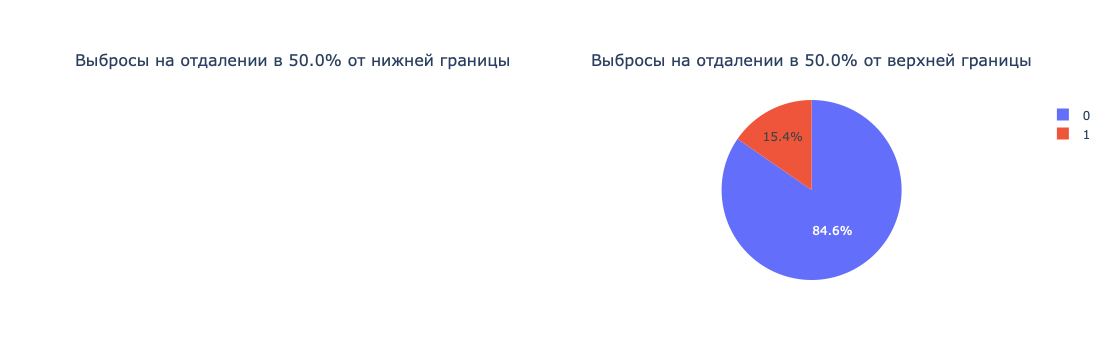

0 32


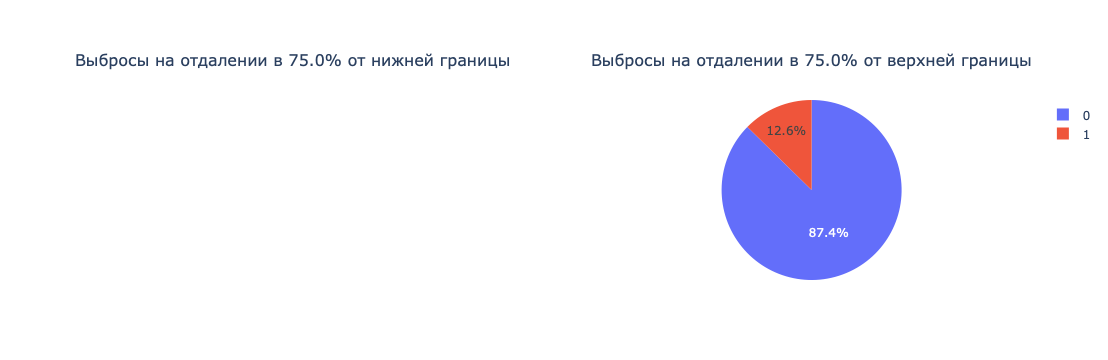

0 29


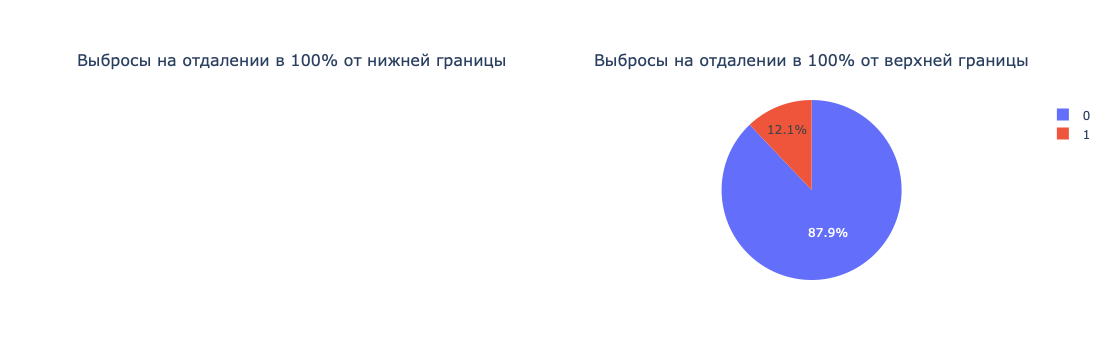

In [34]:
outliers_check(train_data, 'RevolvingUtilizationOfUnsecuredLines')

In [35]:
train_data['RevolvingUtilizationOfUnsecuredLines'].describe()

count    120000.000000
mean          6.128916
std         253.361490
min           0.000000
25%           0.029593
50%           0.153318
75%           0.557832
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [36]:
bins = [0,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,3,5,10,100000]
interval_check(train_data, 'RevolvingUtilizationOfUnsecuredLines', bins)


interval: 0-0.5
amount: 87020
pos: 0.02738450930820501, neg: 0.972615490691795
interval: 0.5-0.6
amount: 4851
pos: 0.08946608946608947, neg: 0.9105339105339105
interval: 0.6-0.7
amount: 4274
pos: 0.10388394946186243, neg: 0.8961160505381376
interval: 0.7-0.8
amount: 3862
pos: 0.14085965820818228, neg: 0.8591403417918178
interval: 0.8-0.9
amount: 4027
pos: 0.16215545070772286, neg: 0.8378445492922771
interval: 0.9-1
amount: 13314
pos: 0.19302989334535076, neg: 0.8069701066546493
interval: 1-1.1
amount: 1486
pos: 0.3573351278600269, neg: 0.642664872139973
interval: 1.1-1.2
amount: 323
pos: 0.49226006191950467, neg: 0.5077399380804953
interval: 1.2-1.3
amount: 171
pos: 0.4269005847953216, neg: 0.5730994152046784
interval: 1.3-1.4
amount: 102
pos: 0.5784313725490197, neg: 0.42156862745098034
interval: 1.4-1.5
amount: 90
pos: 0.4222222222222222, neg: 0.5777777777777777
interval: 1.5-1.6
amount: 50
pos: 0.42, neg: 0.5800000000000001
interval: 1.6-1.7
amount: 49
pos: 0.42857142857142855, neg:

In [37]:
train_data[train_data['RevolvingUtilizationOfUnsecuredLines'] > 2].sample(10)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
138814                 1                              7.308970   54   
117316                 0                          18300.000000   45   
106053                 0                           1155.000000   57   
148986                 0                              2.068589   47   
53720                  1                             29.784884   35   
16367                  0                            601.000000   69   
109557                 0                            747.000000   47   
133479                 0                             14.000000   77   
294                    0                           2340.000000   45   
83351                  0                           1803.000000   44   

        NumberOfTime30-59DaysPastDueNotWorse   DebtRatio  MonthlyIncome  \
138814                                     2    0.152493         3750.0   
117316                                     0    0.221582        12500.0   
106053                                     0    0.620445         7600.0   
148986                                     0    0.246959         6000.0   
53720                                      2    0.535539         5500.0   
16367                                      0    0.001784        10091.0   
109557                                     0  475.000000            0.0   
133479                                     0  282.000000            0.0   
294                                        0    0.339333         8333.0   
83351                                      0    0.233428         8100.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
138814                                4                        2   
117316                                5                        0   
106053                                7                        0   
148986                                5                        0   
53720                                10                        2   
16367                                 4                        0   
109557                                3                        0   
133479                                7                        0   
294                                   7                        0   
83351                                 7                        0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
138814                             0                                     1   
117316                             1                                     0   
106053                             1                                     0   
148986                             1                                     0   
53720                              0                                     4   
16367                              0                                     0   
109557                             1                                     0   
133479                             0                                     0   
294                                2                                     0   
83351                              2                                     0   

        NumberOfDependents  MonthlyIncomeIsMissing  
138814                 1.0                       0  
117316                 2.0                       0  
106053                 0.0                       0  
148986                 1.0                       0  
53720                  0.0                       0  
16367                  0.0                       0  
109557                 0.0                       1  
133479                 0.0                       1  
294                    2.0                       0  
83351                  2.0                       0

In [38]:
'''
Технически соотношение выше 1 возможно, если допустим овердрафт по карте, 
но обычно на более плохих условиях (выше коммисия или %), и шанс получить одобрение нового займа куда ниже,
Статистика также показывает резкий рост доли лиц с просрочкой при прохождении порога = 1 
их доля возрастает с 0.19 до 0.35 и в последствии держится на уровнях 0.4-0.5
Примеров с соотношением выше 2х мало и их оценки статистически не обоснованы, тк в реальной жизни такие случаи - большая редкость, 
не говоря уже о соотношении выше 10, что в общем-то невозможно, а если и возможно, то такие случаи уходят на ручной разбор 
потому всё что выше 2х - дропается
'''
train_data = train_data[train_data['RevolvingUtilizationOfUnsecuredLines'] <= 2].copy()
train_data['RevolvingUtilizationOverOne'] = 0.0

train_data.loc[train_data['RevolvingUtilizationOfUnsecuredLines'] > 1, 'RevolvingUtilizationOverOne'] = 1.0

train_data['RevolvingUtilizationOfUnsecuredLines'] = train_data['RevolvingUtilizationOfUnsecuredLines'].clip(0,1).copy()

## Outliers Age and Age binning

lower_bound: 8.0, upper_bound: 96.0


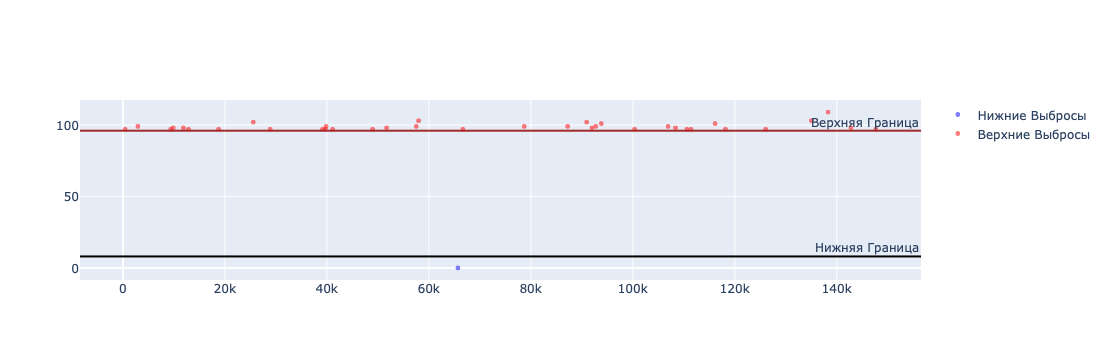

0 3


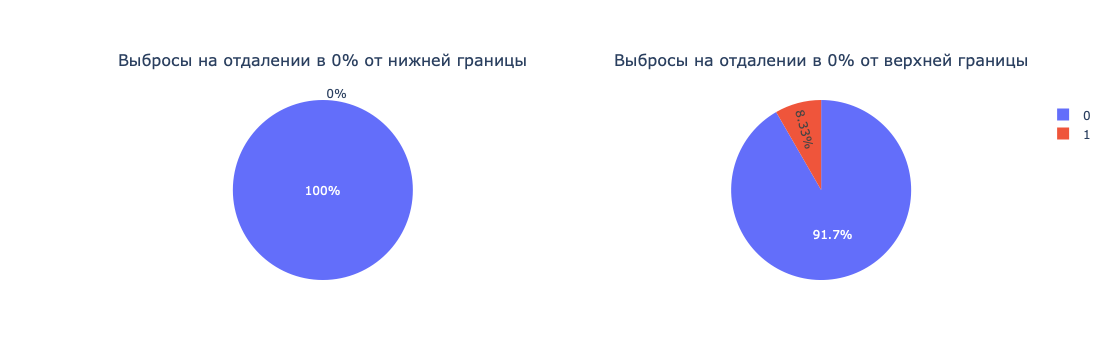

0 0


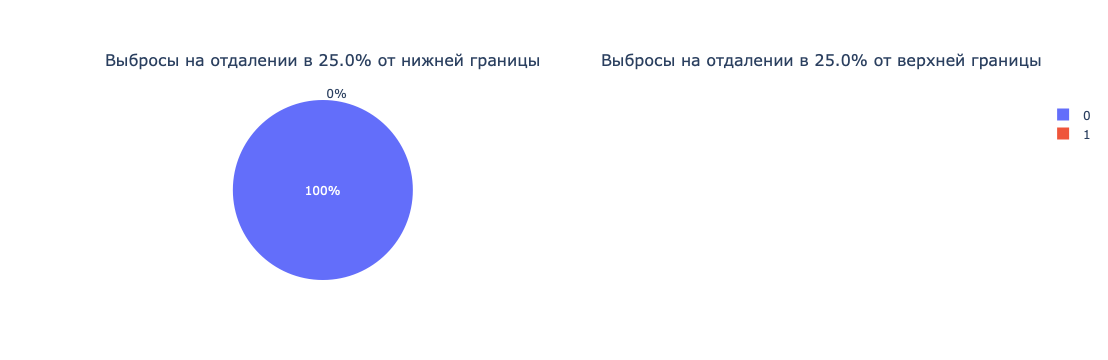

0 0


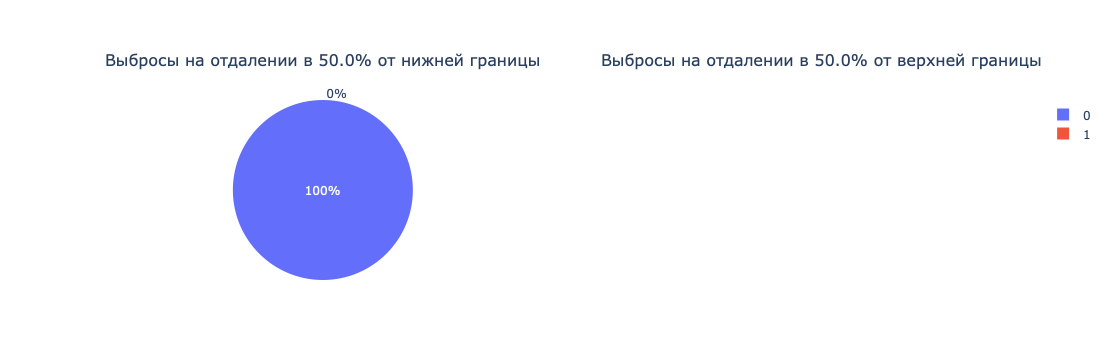

0 0


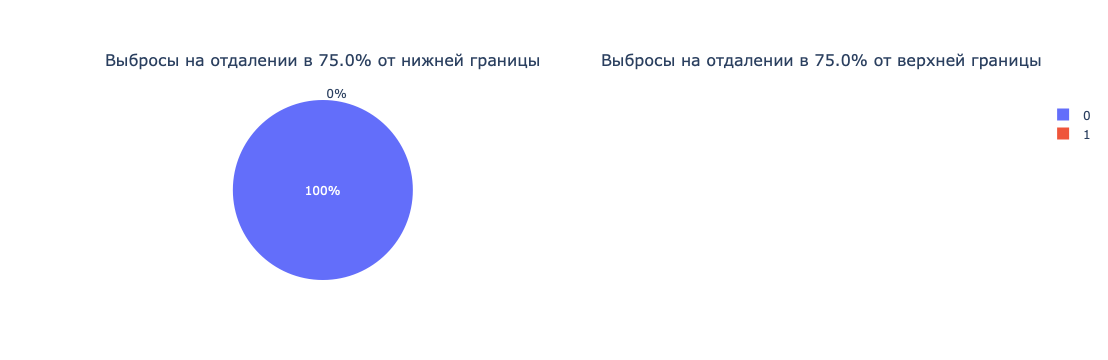

0 0


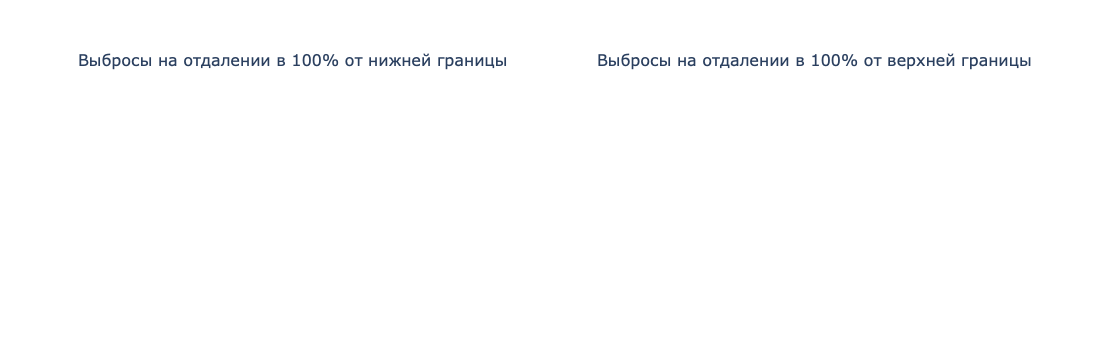

In [39]:
outliers_check(train_data, 'age')

In [40]:
train_data = train_data[train_data['age'] >= 18].copy()

In [41]:
train_data.describe()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     119707.000000                         119707.000000  119707.000000   
mean           0.066604                              0.316818      52.298328   
std            0.249336                              0.347968      14.771153   
min            0.000000                              0.000000      21.000000   
25%            0.000000                              0.029467      41.000000   
50%            0.000000                              0.151998      52.000000   
75%            0.000000                              0.553371      63.000000   
max            1.000000                              1.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         119707.000000  119707.000000   1.197070e+05   
mean                               0.420067     351.878421   5.337781e+03   
std                                4.186946    2094.643495   1.330642e+04   
min                                0.000000       0.000000   0.000000e+00   
25%                                0.000000       0.175252   1.560000e+03   
50%                                0.000000       0.366144   4.350000e+03   
75%                                0.000000       0.859793   7.396000e+03   
max                               98.000000  329664.000000   3.008750e+06   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
count                    119707.000000            119707.000000   
mean                          8.471601                 0.264571   
std                           5.163923                 4.162730   
min                           0.000000                 0.000000   
25%                           5.000000                 0.000000   
50%                           8.000000                 0.000000   
75%                          11.000000                 0.000000   
max                          58.000000                98.000000   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
count                 119707.000000                         119707.000000   
mean                       1.018194                              0.239953   
std                        1.133240                              4.149506   
min                        0.000000                              0.000000   
25%                        0.000000                              0.000000   
50%                        1.000000                              0.000000   
75%                        2.000000                              0.000000   
max                       54.000000                             98.000000   

       NumberOfDependents  MonthlyIncomeIsMissing  RevolvingUtilizationOverOne  
count       119707.000000           119707.000000                119707.000000  
mean             0.737576                0.197173                     0.019615  
std              1.106134                0.397866                     0.138672  
min              0.000000                0.000000                     0.000000  
25%              0.000000                0.000000                     0.000000  
50%              0.000000                0.000000                     0.000000  
75%              1.000000                0.000000                     0.000000  
max             10.000000                1.000000                     1.000000

In [42]:
bins = [0,50,60,70,75,80,85,90,100,110,120,130,150, 1000]
interval_check(train_data, 'age', bins)

interval: 0-50
amount: 52905
pos: 0.09297797939703242, neg: 0.9070220206029675
interval: 50-60
amount: 28243
pos: 0.06518429345324506, neg: 0.9348157065467549
interval: 60-70
amount: 23056
pos: 0.03686675919500347, neg: 0.9631332408049965
interval: 70-75
amount: 6424
pos: 0.02661892901618929, neg: 0.9733810709838107
interval: 75-80
amount: 4439
pos: 0.02185176841630998, neg: 0.97814823158369
interval: 80-85
amount: 2632
pos: 0.02127659574468085, neg: 0.9787234042553191
interval: 85-90
amount: 1473
pos: 0.019687712152070606, neg: 0.9803122878479293
interval: 90-100
amount: 528
pos: 0.017045454545454544, neg: 0.9829545454545454
interval: 100-110
amount: 7
pos: 0.14285714285714285, neg: 0.8571428571428572
interval: 110-120
amount: 0
no pos, no neg
interval: 120-130
amount: 0
no pos, no neg
interval: 130-150
amount: 0
no pos, no neg
interval: 150-1000
amount: 0
no pos, no neg


In [43]:


'''
кредиты старше 80 выдают редко и на особых условиях, 
так что такие случаи автоматически уходят на ручной разбор или отказ
'''
train_data = train_data[train_data['age'] <= 80].copy()
#test_data = test_data[test_data['age'] <= 80].copy()

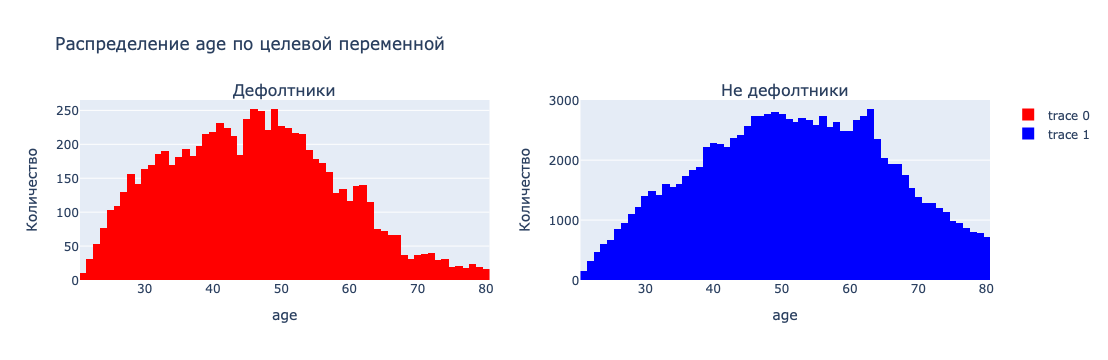

In [44]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def target_distribution(data, col):
    pos = data.loc[data['SeriousDlqin2yrs'] == 1, col]
    neg = data.loc[data['SeriousDlqin2yrs'] == 0, col]
    
    fig = make_subplots(rows = 1, cols = 2, subplot_titles = ['Дефолтники','Не дефолтники'])
    fig.add_trace(
        go.Histogram(
            x = pos,
            marker_color = 'red'
        ),
        row = 1,
        col = 1
    )
    fig.add_trace(
        go.Histogram(
            x = neg,
            marker_color = 'blue'
        ),
        row = 1,
        col = 2
    )
    
    fig.update_layout(title_text = f'Распределение {col} по целевой переменной')
    fig.update_xaxes(title_text = f'{col}', row = 1, col = 1)
    fig.update_xaxes(title_text = f'{col}', row = 1, col = 2)
    fig.update_yaxes(title_text = 'Количество', row = 1, col = 1)
    fig.update_yaxes(title_text = 'Количество', row = 1, col = 2)
    fig.show()
target_distribution(train_data, 'age')

age
21    0.057325
22    0.086455
23    0.102317
24    0.113602
25    0.134034
26    0.114165
27    0.121241
28    0.125000
29    0.103829
30    0.105229
31    0.103112
32    0.115409
33    0.106419
34    0.098946
35    0.102029
36    0.100208
37    0.090592
38    0.094940
39    0.088430
40    0.086835
41    0.092995
42    0.091694
43    0.082133
44    0.071015
45    0.084376
46    0.084592
47    0.083138
48    0.073913
49    0.082512
50    0.075459
51    0.077082
52    0.075763
53    0.073807
54    0.066900
55    0.064751
56    0.058824
57    0.058889
58    0.046512
59    0.050860
60    0.044487
61    0.049180
62    0.048849
63    0.038423
64    0.030515
65    0.034286
66    0.032746
67    0.033149
68    0.020270
69    0.019293
70    0.025370
71    0.028137
72    0.029726
73    0.023577
74    0.026132
75    0.019192
76    0.020855
77    0.019473
78    0.027947
79    0.022670
80    0.022315
Name: SeriousDlqin2yrs, dtype: float64
age
21     157
22     347
23     518
24     669
25     76

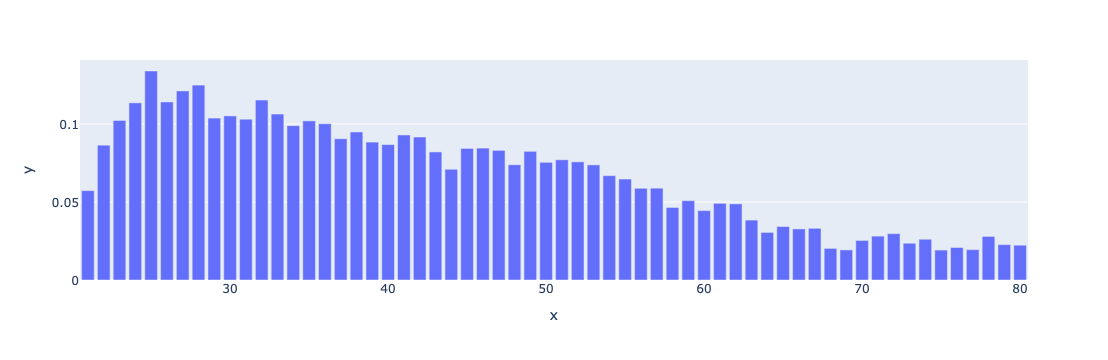

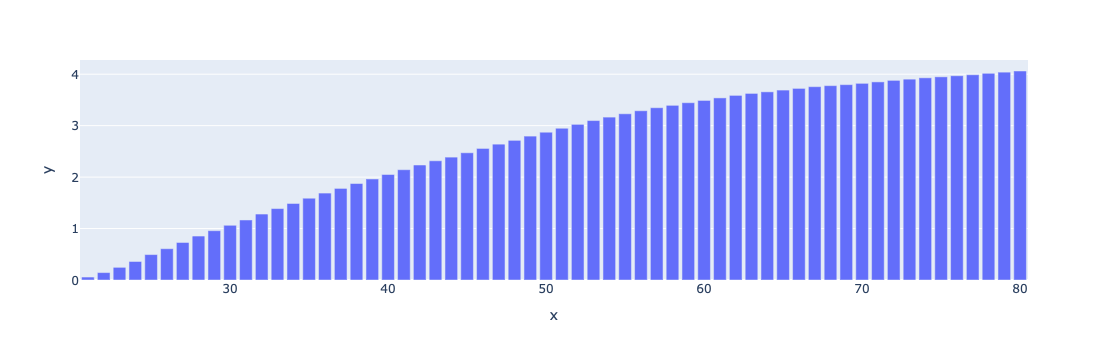

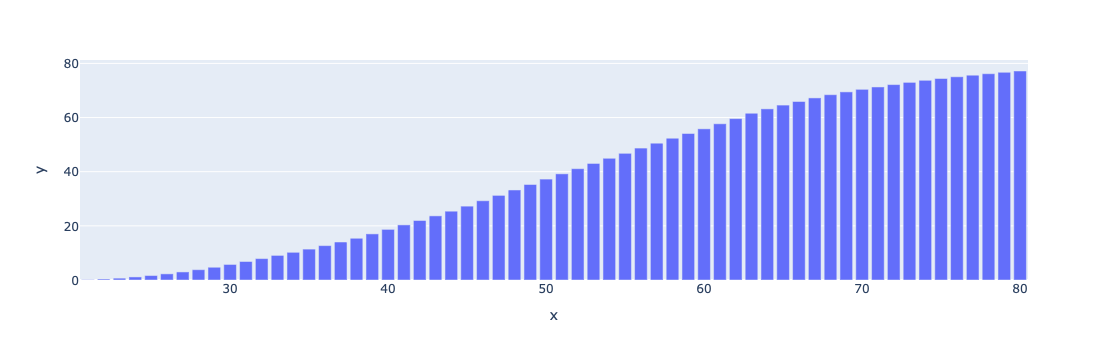

In [45]:
default_rates = train_data.groupby('age')['SeriousDlqin2yrs'].mean()
age_count = train_data.groupby('age')['SeriousDlqin2yrs'].count()
print(default_rates)
print(age_count)
px.bar(x = default_rates.index, y = default_rates.values).show()
px.bar(x = default_rates.index, y = default_rates.cumsum()).show()
px.bar(x = age_count.index, y = age_count.cumsum()/1500).show()


In [46]:
# age_bins = [18, 31, 41, 51, 61, 71, 81]
# age_bins_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80']
# train_data['age_bins'] = pd.cut(
#     x = train_data['age'],
#     bins = age_bins,
#     labels = age_bins_labels,
#     right = False,
#     include_lowest = True)
# train_data['age_bins'] = train_data['age_bins'].astype('category')

# test_data['age_bins'] = pd.cut(
#     x = test_data['age'],
#     bins = age_bins,
#     labels = age_bins_labels,
#     right = False,
#     include_lowest = True)
# test_data['age_bins'] = test_data['age_bins'].astype('category')

# train_data.info()


In [47]:
# train_age_dummies = pd.get_dummies(data = train_data['age_bins'], prefix = 'age').astype('float')
# train_data = pd.concat([train_data.drop(columns = 'age_bins'), train_age_dummies], axis = 1)

# test_age_dummies = pd.get_dummies(data = test_data['age_bins'], prefix = 'age').astype('float')
# test_data = pd.concat([test_data.drop(columns = 'age_bins'), test_age_dummies], axis = 1)

In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115784 entries, 57837 to 80531
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      115784 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  115784 non-null  float64
 2   age                                   115784 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  115784 non-null  int64  
 4   DebtRatio                             115784 non-null  float64
 5   MonthlyIncome                         115784 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       115784 non-null  int64  
 7   NumberOfTimes90DaysLate               115784 non-null  int64  
 8   NumberRealEstateLoansOrLines          115784 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  115784 non-null  int64  
 10  NumberOfDependents                    115784 non-null  float64
 11  Mo

## Outliers DebtRatio

lower_bound: -0.804173207375, upper_bound: 1.824507111625


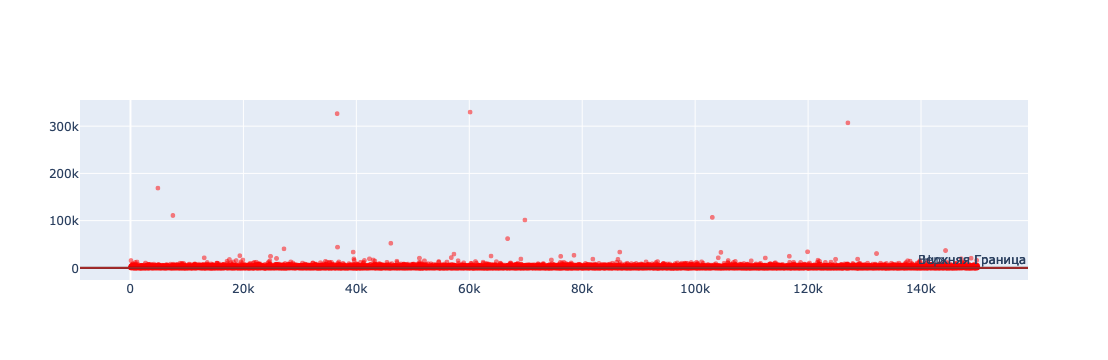

0 1364


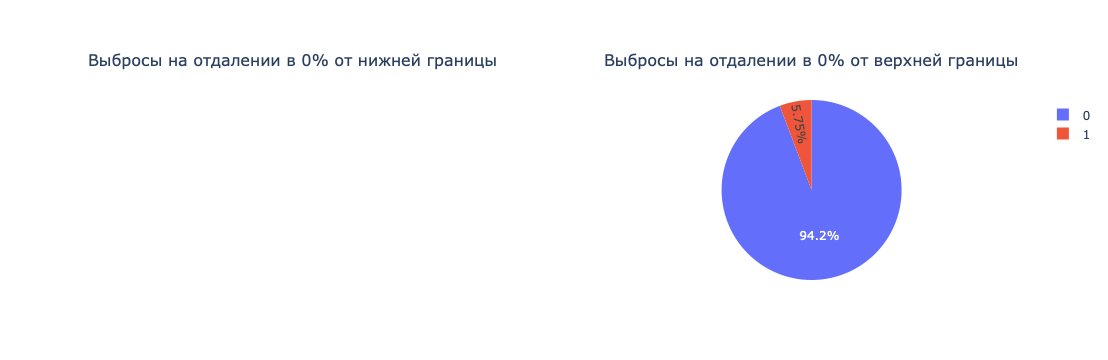

0 1328


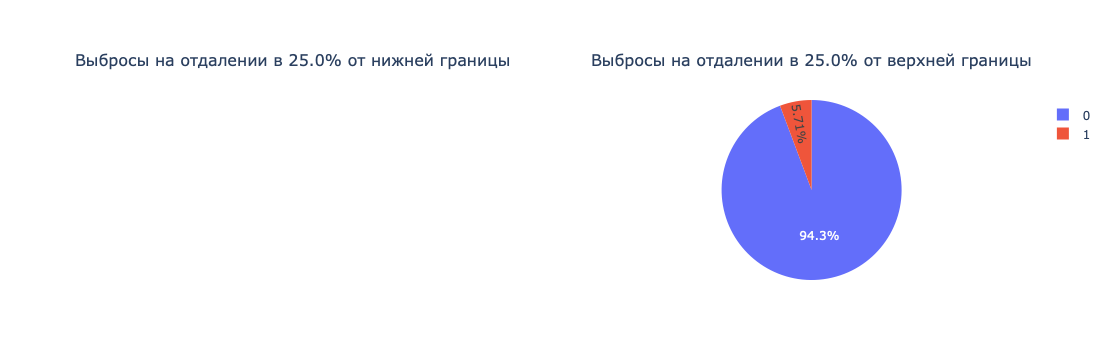

0 1306


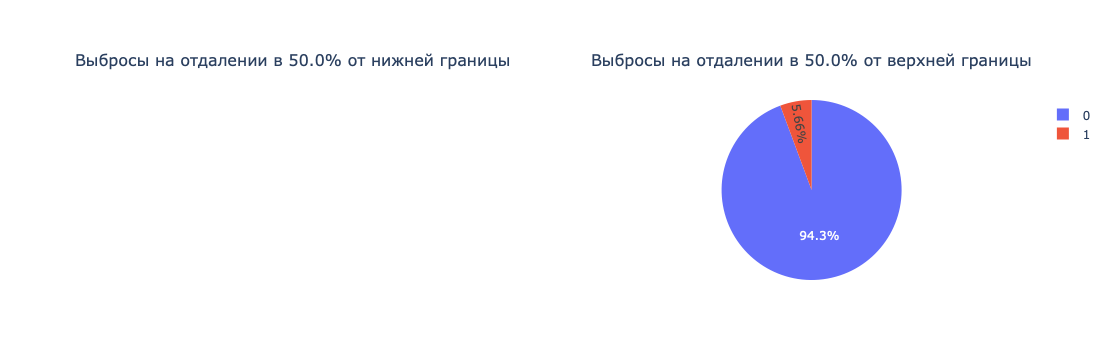

0 1294


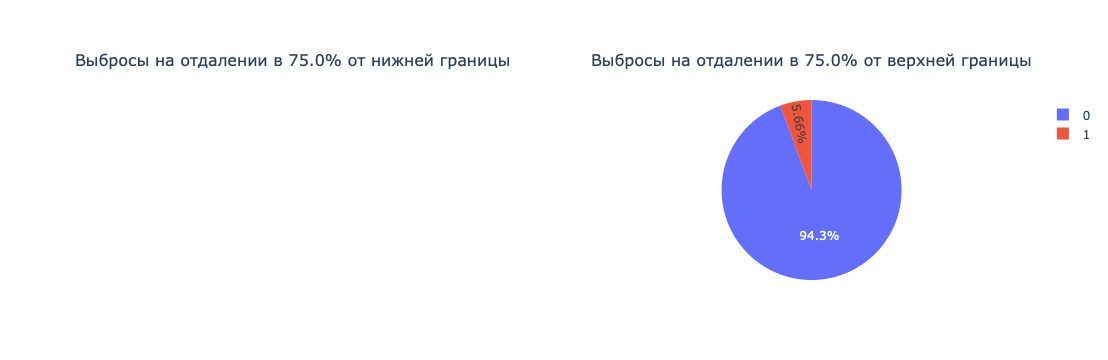

0 1283


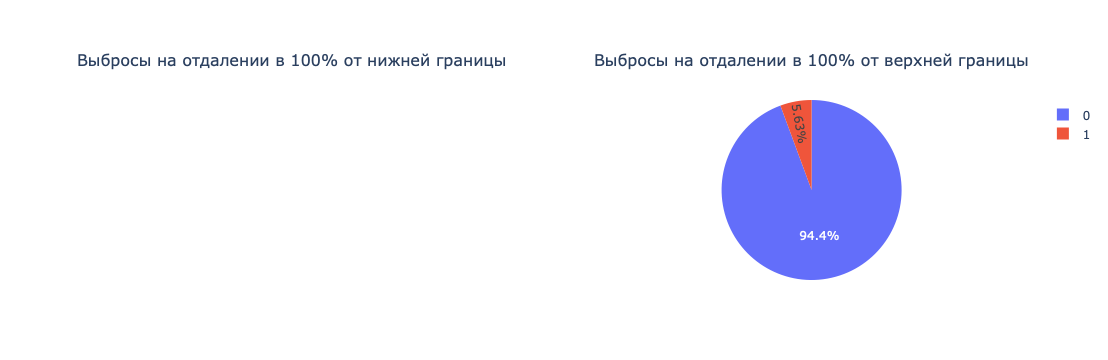

In [49]:
outliers_check(train_data, 'DebtRatio')

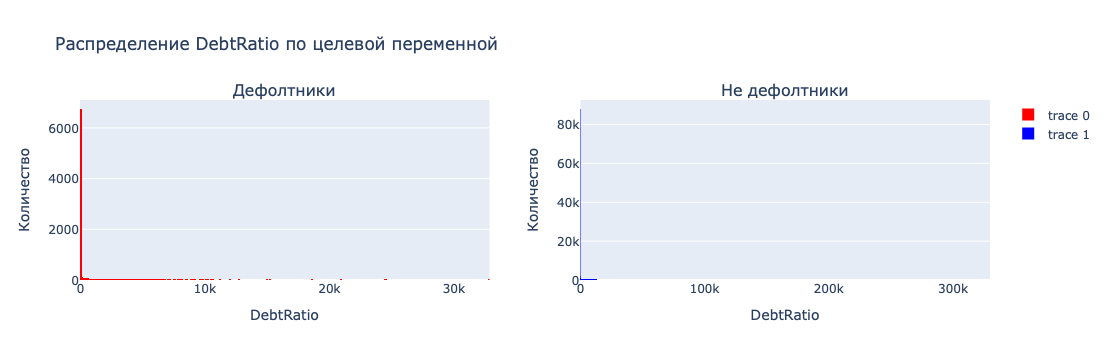

In [50]:
target_distribution(train_data, 'DebtRatio')

In [51]:
train_data['DebtRatio'].describe()

count    115784.000000
mean        359.469210
std        2127.478727
min           0.000000
25%           0.181582
50%           0.368694
75%           0.838752
max      329664.000000
Name: DebtRatio, dtype: float64

In [52]:
bins = [0,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,10,15,20,30,100,1000,2000,3000,5000,100000]
interval_check(train_data,feature_name = 'DebtRatio',bins = bins)

interval: 0-0.5
amount: 72399
pos: 0.061727371925026586, neg: 0.9382726280749734
interval: 0.5-0.6
amount: 6653
pos: 0.08958364647527431, neg: 0.9104163535247257
interval: 0.6-0.7
amount: 4343
pos: 0.09187197789546396, neg: 0.908128022104536
interval: 0.7-0.8
amount: 2690
pos: 0.1137546468401487, neg: 0.8862453531598513
interval: 0.8-0.9
amount: 1716
pos: 0.11305361305361306, neg: 0.8869463869463869
interval: 0.9-1
amount: 1212
pos: 0.13283828382838284, neg: 0.8671617161716172
interval: 1-2
amount: 3230
pos: 0.13188854489164087, neg: 0.8681114551083591
interval: 2-3
amount: 545
pos: 0.08073394495412844, neg: 0.9192660550458716
interval: 3-4
amount: 266
pos: 0.07518796992481203, neg: 0.924812030075188
interval: 4-5
amount: 184
pos: 0.05434782608695652, neg: 0.9456521739130435
interval: 5-10
amount: 520
pos: 0.05, neg: 0.95
interval: 10-15
amount: 371
pos: 0.05390835579514825, neg: 0.9460916442048517
interval: 15-20
amount: 287
pos: 0.04878048780487805, neg: 0.9512195121951219
interval: 

In [53]:
debt_intervals = [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,2,2.5,3,4,5,6,7,8,9,10,
                  15,30,50,100,300,500,1000,1500, 2000, 3000, 4000, 5000, 10000]
debt_interval_targets = {}
for interval in debt_intervals:
    debt_over_interval = train_data.loc[(train_data['DebtRatio']>=interval) & (train_data['MonthlyIncome'] == 1),'SeriousDlqin2yrs']
    debt_interval_targets[interval] = [debt_over_interval[debt_over_interval == 1].count(),
                                        debt_over_interval[debt_over_interval == 0].count()]

print(debt_interval_targets)

for interval, interval_targets in debt_interval_targets.items():
    if (interval_targets[0] + interval_targets[1]) == 0:
        print(interval, 0)
        continue
    print(interval, round(interval_targets[0] / (interval_targets[0] + interval_targets[1]), 3))

    

{0.5: [9, 447], 0.6: [9, 445], 0.7: [9, 445], 0.8: [9, 445], 0.9: [9, 445], 1: [9, 445], 1.1: [9, 445], 1.2: [9, 445], 1.3: [9, 445], 1.4: [9, 445], 1.5: [9, 445], 2: [9, 444], 2.5: [9, 441], 3: [9, 439], 4: [9, 434], 5: [9, 432], 6: [9, 430], 7: [9, 428], 8: [9, 428], 9: [9, 423], 10: [9, 422], 15: [9, 417], 30: [9, 405], 50: [9, 385], 100: [8, 365], 300: [8, 304], 500: [8, 247], 1000: [6, 171], 1500: [5, 88], 2000: [3, 42], 3000: [2, 10], 4000: [2, 6], 5000: [2, 4], 10000: [0, 0]}
0.5 0.02
0.6 0.02
0.7 0.02
0.8 0.02
0.9 0.02
1 0.02
1.1 0.02
1.2 0.02
1.3 0.02
1.4 0.02
1.5 0.02
2 0.02
2.5 0.02
3 0.02
4 0.02
5 0.02
6 0.021
7 0.021
8 0.021
9 0.021
10 0.021
15 0.021
30 0.022
50 0.023
100 0.021
300 0.026
500 0.031
1000 0.034
1500 0.054
2000 0.067
3000 0.167
4000 0.25
5000 0.333
10000 0


In [54]:
train_no_income = train_data.loc[train_data['MonthlyIncome'] <= 1]
print(train_no_income['SeriousDlqin2yrs'].value_counts())

SeriousDlqin2yrs
0    22553
1     1358
Name: count, dtype: int64


In [55]:
train_no_income['DebtRatio'].describe()

count     23911.000000
mean       1739.037472
std        4418.038601
min           0.000000
25%         205.000000
50%        1240.000000
75%        2431.000000
max      329664.000000
Name: DebtRatio, dtype: float64

In [56]:
train_data[train_data['MonthlyIncome'] == 0]

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
57837                  0                              0.114987   62   
37853                  0                              1.000000   60   
110783                 0                              0.040808   65   
58933                  0                              0.062038   36   
81398                  1                              0.609795   62   
...                  ...                                   ...  ...   
97590                  0                              0.237835   37   
82570                  0                              0.020472   70   
108924                 0                              0.013345   64   
109981                 0                              1.000000   80   
80531                  0                              1.000000   41   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
57837                                      0     1841.0            0.0   
37853                                      0      118.0            0.0   
110783                                     0     2715.0            0.0   
58933                                      0     2399.0            0.0   
81398                                      3     1077.0            0.0   
...                                      ...        ...            ...   
97590                                      0      378.0            0.0   
82570                                      0     1317.0            0.0   
108924                                     0       15.0            0.0   
109981                                     0       35.0            0.0   
80531                                      1      866.0            0.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
57837                                 5                        0   
37853                                 5                        0   
110783                                4                        0   
58933                                 9                        0   
81398                                15                        0   
...                                 ...                      ...   
97590                                 4                        0   
82570                                16                        0   
108924                                9                        0   
109981                                0                        0   
80531                                 3                        0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
57837                              1                                     0   
37853                              0                                     0   
110783                             2                                     0   
58933                              1                                     0   
81398                              0                                     0   
...                              ...                                   ...   
97590                              0                                     0   
82570                              1                                     0   
108924                             0                                     0   
109981                             0                                     0   
80531                              0                                     1   

        NumberOfDependents  MonthlyIncomeIsMissing  \
57837                  2.0                       1   
37853                  0.0                       1   
110783                 0.0                       1   
58933                  0.0                       1   
81398                  0.0                       1   
...                    ...                     ...   
97590                  0.0                       1   
82570                  0.0                       1   
108924                 0.0

In [57]:
train_data['DebtPayments'] = 0.0
train_data.loc[train_data['MonthlyIncome'] == 0,'DebtPayments'] = train_data.loc[train_data['MonthlyIncome'] == 0,'DebtRatio']

train_data.loc[train_data['MonthlyIncome'] != 0,'DebtPayments'] = train_data.loc[train_data['MonthlyIncome'] != 0,'DebtRatio'] * train_data.loc[train_data['MonthlyIncome'] != 0,'MonthlyIncome']

train_data['DebtRatio'] = train_data['DebtRatio'].clip(0,5).copy()
# test_data['DebtPayments'] = 0
# test_data.loc[test_data['MonthlyIncome'] == 0,'DebtPayments'] = test_data.loc[test_data['MonthlyIncome'] == 0,'DebtRatio']

# test_data.loc[test_data['MonthlyIncome'] != 0,'DebtPayments'] = test_data.loc[test_data['MonthlyIncome'] != 0,'DebtRatio'] * test_data.loc[test_data['MonthlyIncome'] != 0,'MonthlyIncome']



lower_bound: -2795.1459370762495, upper_bound: 6215.53362864575


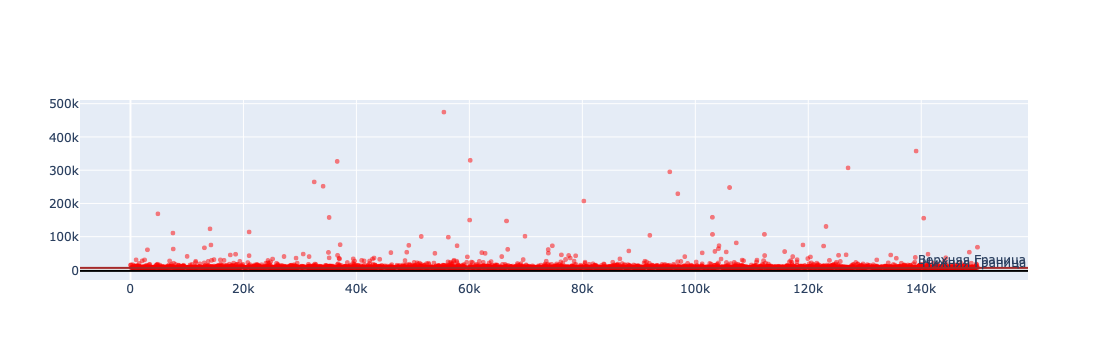

0 461


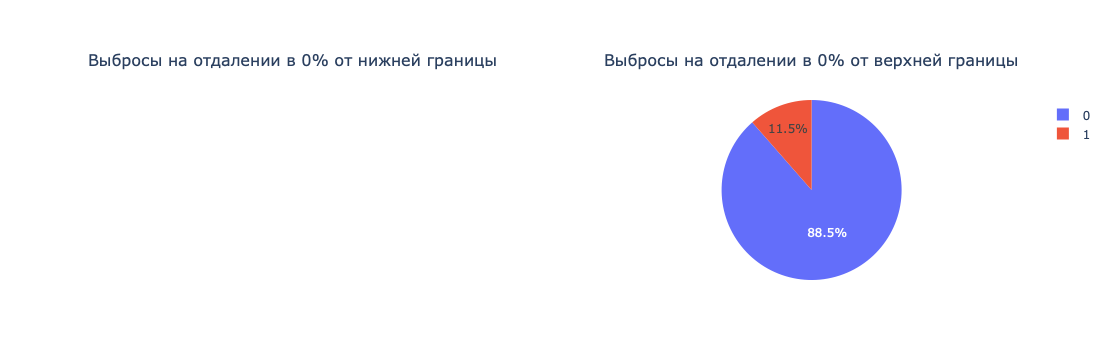

0 240


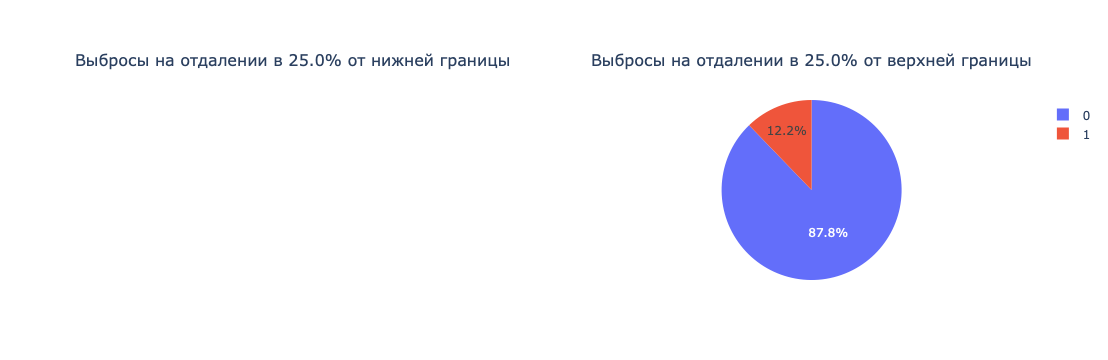

0 160


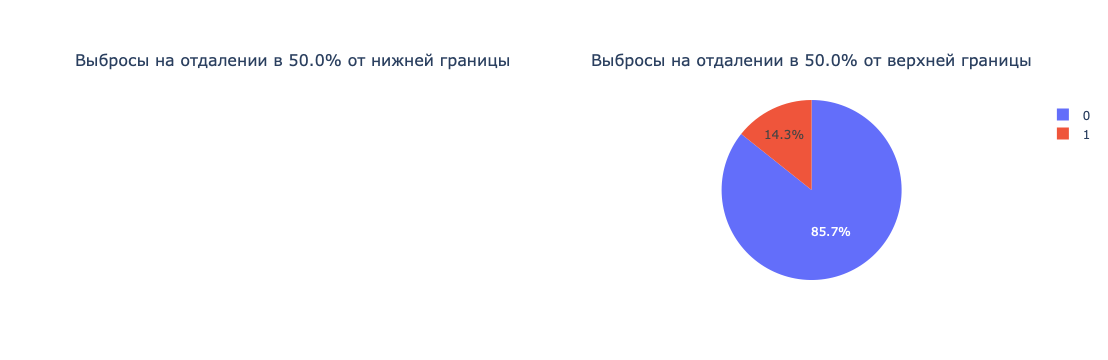

0 103


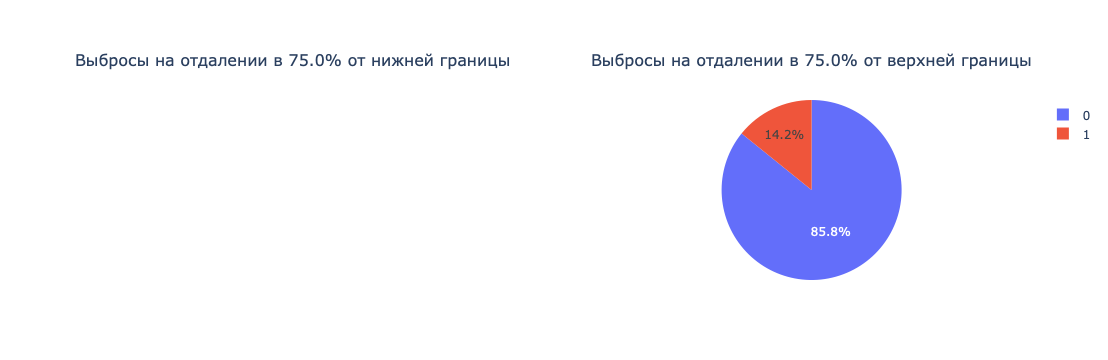

0 62


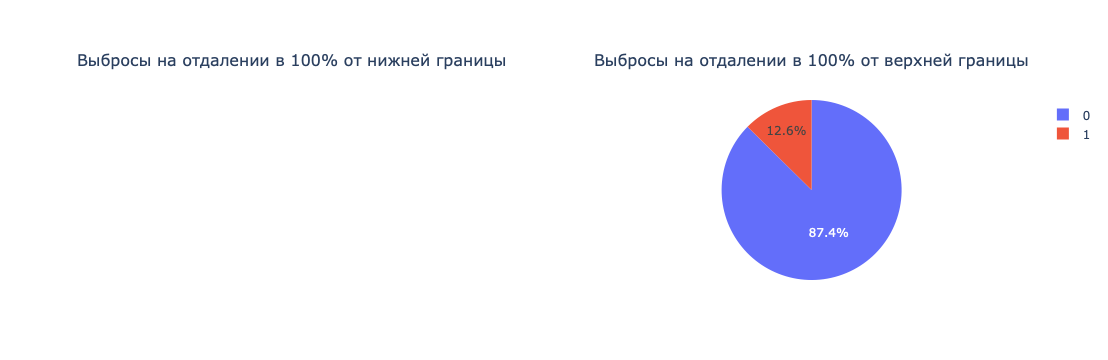

In [58]:
outliers_check(train_data, 'DebtPayments')

In [59]:
bins = [0,1,10,15,30,50,100,300,500,1000,1500, 2000, 3000, 4000, 5000, 6000,
        7000, 8000, 9000,10000, 11000, 12000, 13000, 14000, 15000,10e6]
interval_check(train_data, 'DebtPayments', bins = bins)

interval: 0-1
amount: 3100
pos: 0.09032258064516129, neg: 0.9096774193548387
interval: 1-10
amount: 2036
pos: 0.0343811394891945, neg: 0.9656188605108055
interval: 10-15
amount: 917
pos: 0.06652126499454744, neg: 0.9334787350054525
interval: 15-30
amount: 2208
pos: 0.04755434782608696, neg: 0.9524456521739131
interval: 30-50
amount: 2218
pos: 0.05320108205590622, neg: 0.9467989179440938
interval: 50-100
amount: 3215
pos: 0.05069984447900466, neg: 0.9493001555209953
interval: 100-300
amount: 5941
pos: 0.080794479043932, neg: 0.919205520956068
interval: 300-500
amount: 6415
pos: 0.08495713172252534, neg: 0.9150428682774747
interval: 500-1000
amount: 15046
pos: 0.07995480526385751, neg: 0.9200451947361425
interval: 1000-1500
amount: 14002
pos: 0.06277674617911727, neg: 0.9372232538208827
interval: 1500-2000
amount: 13492
pos: 0.05766380077082716, neg: 0.9423361992291729
interval: 2000-3000
amount: 21046
pos: 0.05763565523139789, neg: 0.9423643447686021
interval: 3000-4000
amount: 12111
po

In [60]:
train_data['DebtPayments'].describe()

count    115784.000000
mean       2089.501191
std        4070.053302
min           0.000000
25%         583.858900
50%        1602.776376
75%        2836.528791
max      474639.287774
Name: DebtPayments, dtype: float64

In [61]:
debt_intervals = [1,10,15,30,50,100,300,500,1000,1500, 2000, 3000, 4000, 5000,6e3,7e3,8e3,8.5e3,9e3, 10000, 15000, 30000]
debt_interval_targets = {}
for interval in debt_intervals:
    debt_over_interval = train_data.loc[(train_data['DebtPayments']>=interval),'SeriousDlqin2yrs']
    debt_interval_targets[interval] = [debt_over_interval[debt_over_interval == 1].count(),
                                        debt_over_interval[debt_over_interval == 0].count()]

print(debt_interval_targets)

for interval, interval_targets in debt_interval_targets.items():
    print(interval, round(interval_targets[0] / (interval_targets[0] + interval_targets[1]), 3))

{1: [7614, 105070], 10: [7544, 103104], 15: [7483, 102248], 30: [7378, 100145], 50: [7260, 98045], 100: [7097, 94993], 300: [6617, 89532], 500: [6072, 83662], 1000: [4869, 69819], 1500: [3990, 56696], 2000: [3212, 43982], 3000: [1999, 24149], 4000: [1241, 12796], 5000: [783, 7011], 6000.0: [512, 4004], 7000.0: [319, 2435], 8000.0: [222, 1565], 8500.0: [196, 1308], 9000.0: [173, 1070], 10000: [132, 782], 15000: [38, 273], 30000: [12, 89]}
1 0.068
10 0.068
15 0.068
30 0.069
50 0.069
100 0.07
300 0.069
500 0.068
1000 0.065
1500 0.066
2000 0.068
3000 0.076
4000 0.088
5000 0.1
6000.0 0.113
7000.0 0.116
8000.0 0.124
8500.0 0.13
9000.0 0.139
10000 0.144
15000 0.122
30000 0.119


In [62]:
'''
после 10к значений в бинах слишком мало, доля положительного таргета растёт до порога признака в 10к, далее стабилизируется +- около 0.15, 
потому делаем клип и признак-флаг - платежи от 10 тыс долларов. Понятно интерпретируемый признак.
'''

train_data['DebtPayments_over_10k'] = 0.0
train_data.loc[train_data['DebtPayments'] > 10000,'DebtPayments_over_10k'] = 1.0
train_data['DebtPayments'] = train_data['DebtPayments'].clip(0,10000).copy()

# train_data['DebtPayments_below_3k'] = train_data['DebtPayments'] < 3000
# train_data['DebtPayments_between_3k_10k'] = (train_data['DebtPayments'] > 3000) & (train_data['DebtPayments'] < 10000)


# test_data['DebtPaymentsClipped'] = test_data['DebtPayments'].clip(0,9000)
# test_data['DebtPayments_below_3k'] = test_data['DebtPayments'] < 3000
# test_data['DebtPayments_between_3k_10k'] = (test_data['DebtPayments'] > 3000) & (test_data['DebtPayments'] < 10000)
# test_data['DebtPayments_over_10k'] = test_data['DebtPayments'] > 10000



# по факту оставляем clipped и ove_9k, ключевеой порог = 9000, тк после него риск заметно возрастает, 
# а для самых высоких платежей нет репрезентативной выборки, потому clipped, приравнивая их к 9000

## Outliers MonthlyIncome

In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115784 entries, 57837 to 80531
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      115784 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  115784 non-null  float64
 2   age                                   115784 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  115784 non-null  int64  
 4   DebtRatio                             115784 non-null  float64
 5   MonthlyIncome                         115784 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       115784 non-null  int64  
 7   NumberOfTimes90DaysLate               115784 non-null  int64  
 8   NumberRealEstateLoansOrLines          115784 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  115784 non-null  int64  
 10  NumberOfDependents                    115784 non-null  float64
 11  Mo

In [64]:
train_data['MonthlyIncome'].describe()

count    1.157840e+05
mean     5.410576e+03
std      1.348796e+04
min      0.000000e+00
25%      1.693500e+03
50%      4.442000e+03
75%      7.499000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [65]:
bins = [0,1e2,1e3,3e3,5e3,6e3,7e3,8e3,9e3,1e4,1.1e4,1.2e4,1.3e4,1.4e4,1.5e4,1.6e4,
        1.7e4,1.8e4,1.9e4,2e4,
        #2.1e4,2.2e4,2.3e4,2.4e4,2.5e4,2.6e4,2.7e4,2.8e4,2.9e4,3e4,5e4,1e6,1e7,
        1e8]

interval_check(train_data, 'MonthlyIncome',bins = bins)


interval: 0-100.0
amount: 23939
pos: 0.05676928860854672, neg: 0.9432307113914533
interval: 100.0-1000.0
amount: 1655
pos: 0.06465256797583081, neg: 0.9353474320241691
interval: 1000.0-3000.0
amount: 14540
pos: 0.10220082530949105, neg: 0.897799174690509
interval: 3000.0-5000.0
amount: 23142
pos: 0.08650937689050212, neg: 0.9134906231094979
interval: 5000.0-6000.0
amount: 10893
pos: 0.07013678509134307, neg: 0.929863214908657
interval: 6000.0-7000.0
amount: 8914
pos: 0.06349562485977114, neg: 0.9365043751402289
interval: 7000.0-8000.0
amount: 7057
pos: 0.056823012611591325, neg: 0.9431769873884087
interval: 8000.0-9000.0
amount: 5942
pos: 0.05116122517670818, neg: 0.9488387748232918
interval: 9000.0-10000.0
amount: 4163
pos: 0.05308671631035311, neg: 0.9469132836896469
interval: 10000.0-11000.0
amount: 4336
pos: 0.04174354243542435, neg: 0.9582564575645757
interval: 11000.0-12000.0
amount: 2316
pos: 0.039723661485319514, neg: 0.9602763385146805
interval: 12000.0-13000.0
amount: 2109
po

lower_bound: -7014.75, upper_bound: 16207.25


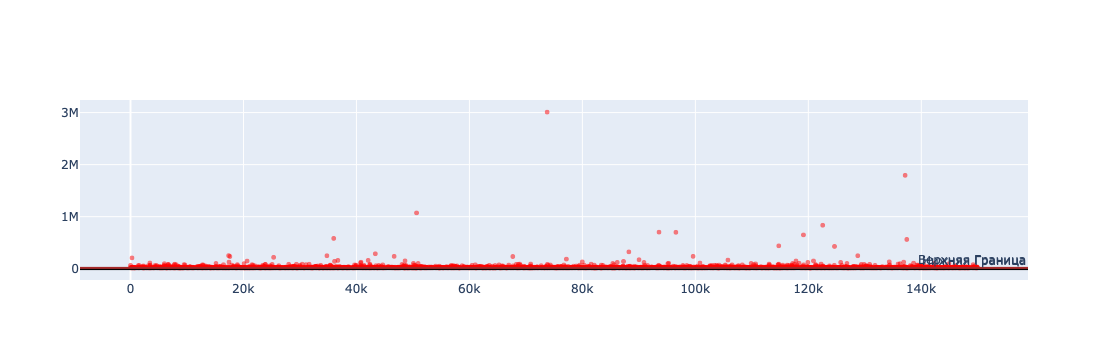

0 166


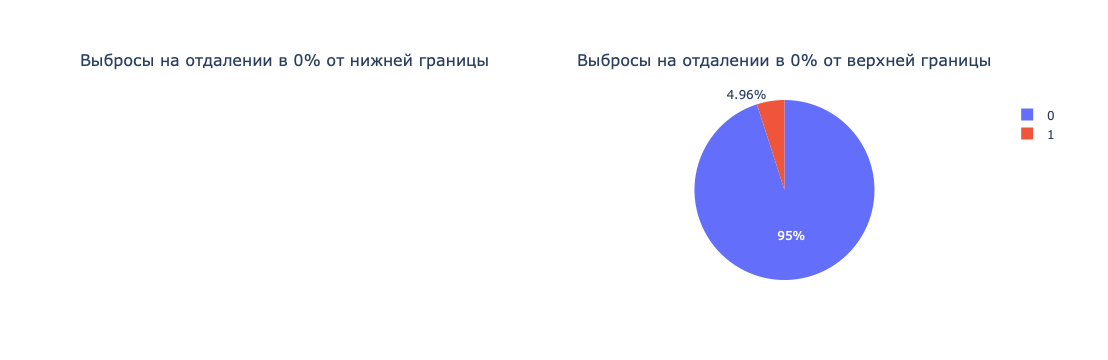

0 89


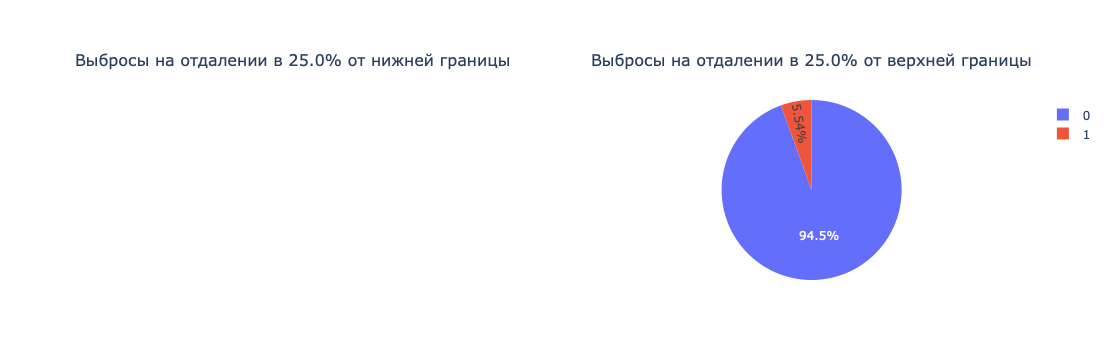

0 58


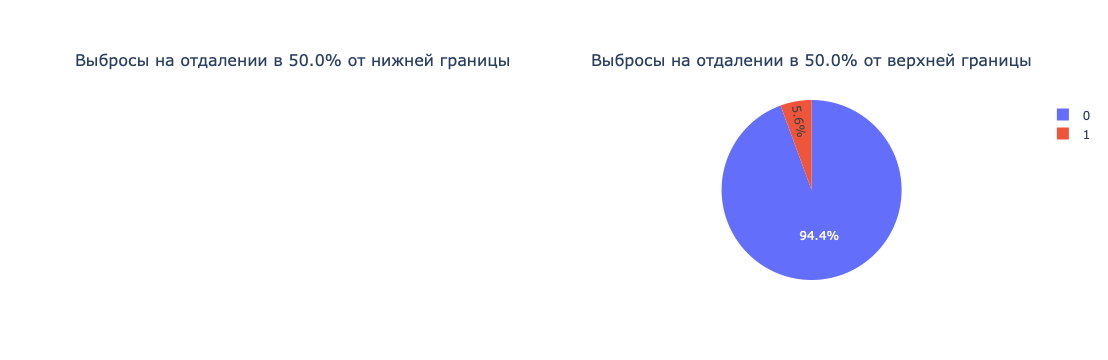

0 38


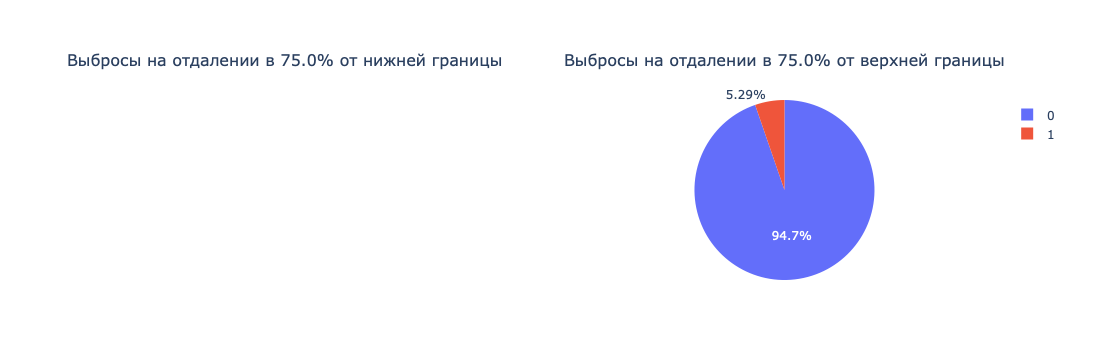

0 31


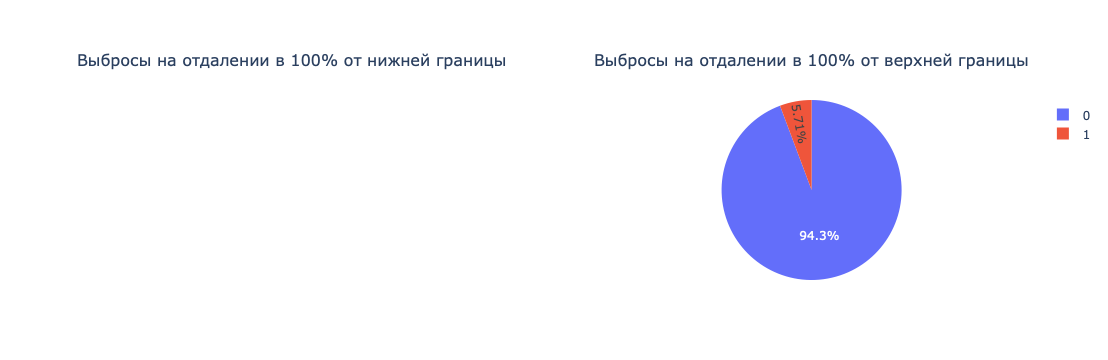

In [66]:
outliers_check(train_data, 'MonthlyIncome')

In [67]:
'''
больше 20 тыс MonthlyIncome - 1821 пример, iqr граница - ~16200, 
однако с ростом дохода доля положительного таргета не сильно меняется и остаётся на уровне 0.04-0.05, 
потому делается клип + признак-флаг, что доход больше 20 тыс долларов.
дропа нет, тк доходы выше 20 тыс долларов вполне реальны, однако риск дефолта для них остаётся на уровне от 20 тыс +-
'''
train_data['MonthlyIncome_over_20k'] = 0.0
train_data.loc[train_data['MonthlyIncome'] >= 20e3,'MonthlyIncome_over_20k'] = 1.0
train_data['MonthlyIncome'] = train_data['MonthlyIncome'].clip(0,20e3)

# test_data['MonthlyIncome_over_20k'] = 0
# test_data.loc[test_data['MonthlyIncome'] >= 20e3,'MonthlyIncome_over_20k'] = 1.0
# test_data['MonthlyIncome'] = test_data['MonthlyIncome'].clip(0,20e3)

In [68]:
train_data.nunique()

SeriousDlqin2yrs                            2
RevolvingUtilizationOfUnsecuredLines    95319
age                                        60
NumberOfTime30-59DaysPastDueNotWorse       16
DebtRatio                               85324
MonthlyIncome                           11826
NumberOfOpenCreditLinesAndLoans            58
NumberOfTimes90DaysLate                    19
NumberRealEstateLoansOrLines               28
NumberOfTime60-89DaysPastDueNotWorse       13
NumberOfDependents                         11
MonthlyIncomeIsMissing                      2
RevolvingUtilizationOverOne                 2
DebtPayments                            90956
DebtPayments_over_10k                       2
MonthlyIncome_over_20k                      2
dtype: int64

## Outliers PastDueNotWorse
NumberOfTime30-59DaysPastDueNotWorse, 
NumberOfTime60-89DaysPastDueNotWorse, 
NumberOfTimes90DaysLate

In [69]:
'''
Необходимо посмотреть на значения 96, 98.
Также три признака являюстя линейно зависимыми, потому после обработки выбросов стоит создать новый признак, как их линейную комбинацию
'''

'\nНеобходимо посмотреть на значения 96, 98.\nТакже три признака являюстя линейно зависимыми, потому после обработки выбросов стоит создать новый признак, как их линейную комбинацию\n'

lower_bound: 0.0, upper_bound: 0.0


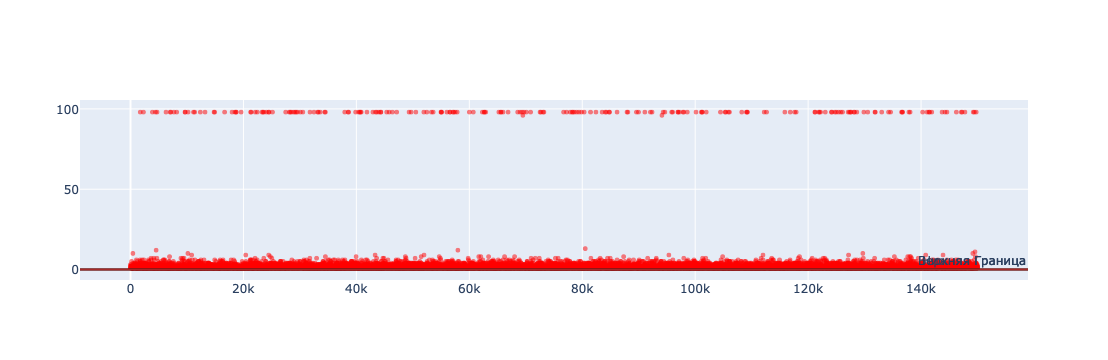

0 3899


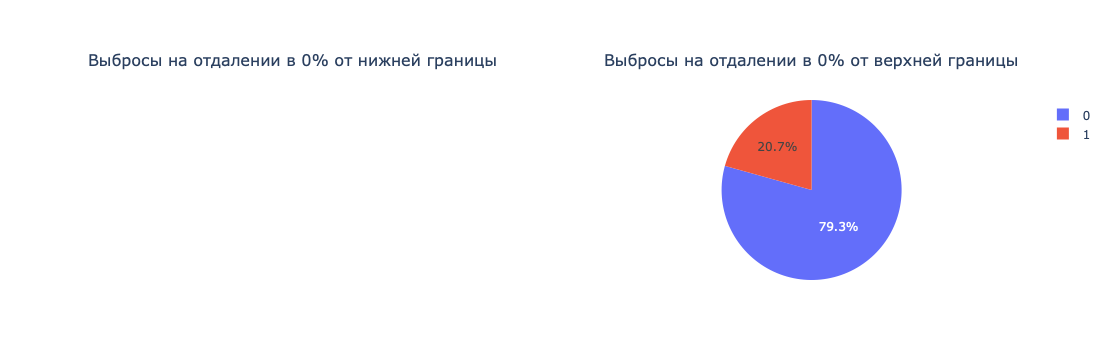

0 3899


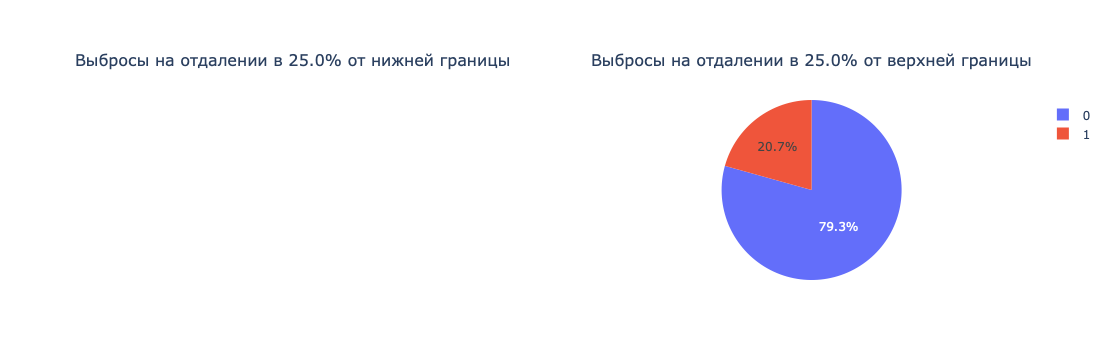

0 3899


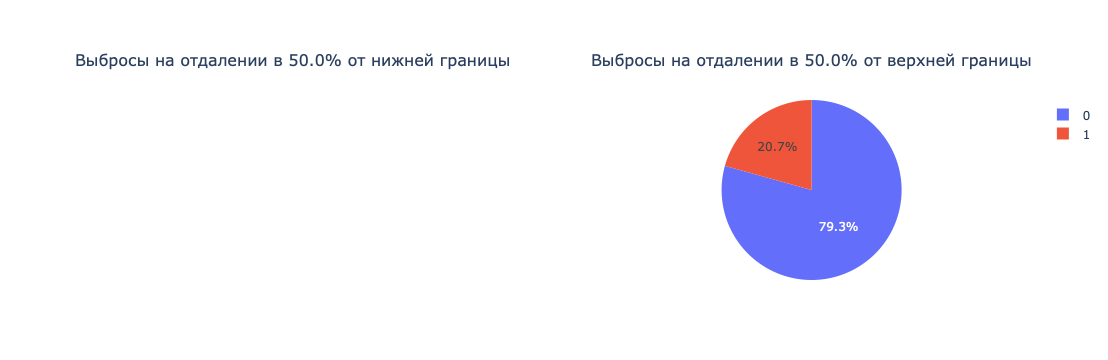

0 3899


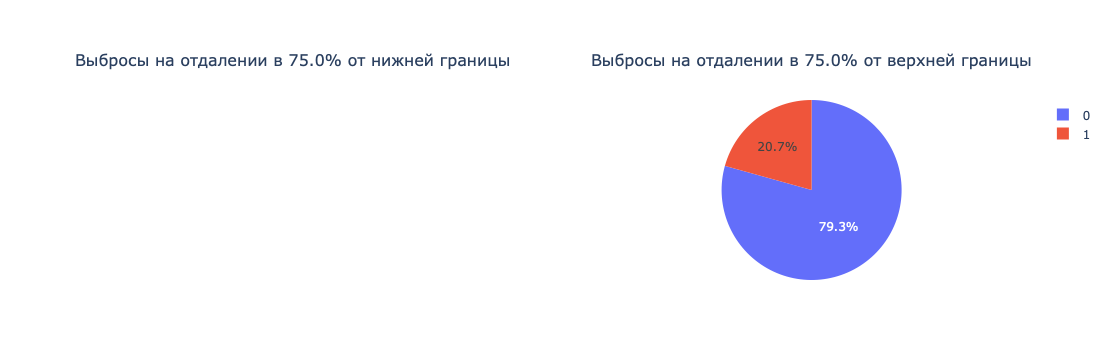

0 3899


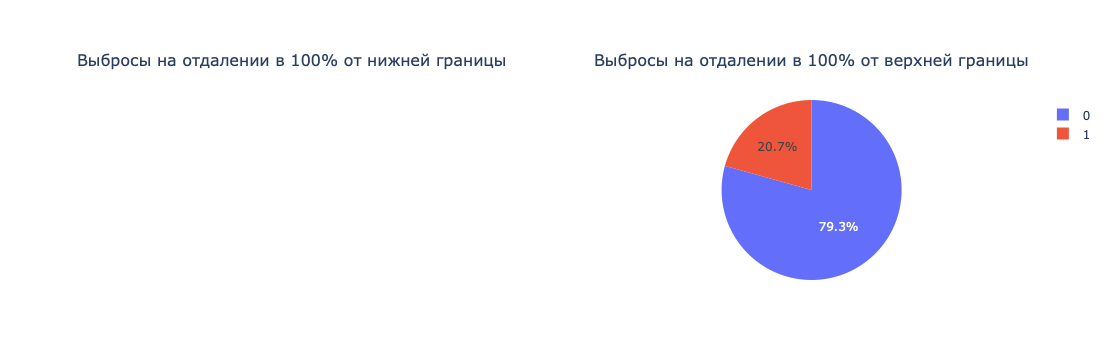

In [70]:
outliers_check(train_data, 'NumberOfTime30-59DaysPastDueNotWorse')

In [71]:
train_data.describe()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     115784.000000                         115784.000000  115784.000000   
mean           0.068179                              0.323410      51.180068   
std            0.252053                              0.348923      13.672995   
min            0.000000                              0.000000      21.000000   
25%            0.000000                              0.032074      41.000000   
50%            0.000000                              0.162021      51.000000   
75%            0.000000                              0.567459      62.000000   
max            1.000000                              1.000000      80.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         115784.000000  115784.000000  115784.000000   
mean                               0.430794       1.270930    5100.025824   
std                                4.256071       1.868517    4453.466209   
min                                0.000000       0.000000       0.000000   
25%                                0.000000       0.181582    1693.500000   
50%                                0.000000       0.368694    4442.000000   
75%                                0.000000       0.838752    7499.000000   
max                               98.000000       5.000000   20000.000000   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
count                    115784.000000            115784.000000   
mean                          8.522274                 0.272948   
std                           5.169618                 4.232296   
min                           0.000000                 0.000000   
25%                           5.000000                 0.000000   
50%                           8.000000                 0.000000   
75%                          11.000000                 0.000000   
max                          58.000000                98.000000   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
count                 115784.000000                         115784.000000   
mean                       1.040576                              0.247314   
std                        1.137990                              4.218894   
min                        0.000000                              0.000000   
25%                        0.000000                              0.000000   
50%                        1.000000                              0.000000   
75%                        2.000000                              0.000000   
max                       54.000000                             98.000000   

       NumberOfDependents  MonthlyIncomeIsMissing  \
count       115784.000000           115784.000000   
mean             0.759371                0.191184   
std              1.116713                0.393235   
min              0.000000                0.000000   
25%              0.000000                0.000000   
50%              0.000000                0.000000   
75%              1.000000                0.000000   
max             10.000000                1.000000   

       RevolvingUtilizationOverOne   DebtPayments  DebtPayments_over_10k  \
count                115784.000000  115784.000000          115784.000000   
mean                      0.020184    1995.161342               0.007894   
std                       0.140630    1848.510655               0.088497   
min                       0.000000       0.000000               0.000000   
25%                       0.000000     583.858900               0.000000   
50%                       0.000000    1602.776376               0.000000   
75%                       0.000000    2836.528791               0.000000   
max                       1.000000   10000.000000               1.000000   

       MonthlyIncome_over_20k  
count           115784.000000  
mean                 0.015728  
std                  0.124420  
min

In [72]:
train_data['NumberOfTime30-59DaysPastDueNotWorse'].unique()

array([ 0,  1,  2,  3,  4, 98,  5,  7,  6,  8,  9, 96, 10, 13, 12, 11])

In [73]:
bins = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,95,97,100]

interval_check(train_data, 'NumberOfTimes90DaysLate', bins = bins)


interval: 0-1
amount: 109176
pos: 0.04710742287682274, neg: 0.9528925771231772
interval: 1-2
amount: 4166
pos: 0.33893422947671625, neg: 0.6610657705232837
interval: 2-3
amount: 1243
pos: 0.49396621078037006, neg: 0.5060337892196299
interval: 3-4
amount: 520
pos: 0.5788461538461539, neg: 0.4211538461538461
interval: 4-5
amount: 234
pos: 0.6752136752136753, neg: 0.32478632478632474
interval: 5-6
amount: 99
pos: 0.6363636363636364, neg: 0.36363636363636365
interval: 6-7
amount: 60
pos: 0.55, neg: 0.44999999999999996
interval: 7-8
amount: 27
pos: 0.7407407407407407, neg: 0.2592592592592593
interval: 8-9
amount: 14
pos: 0.6428571428571429, neg: 0.3571428571428571
interval: 9-10
amount: 13
pos: 0.9230769230769231, neg: 0.07692307692307687
interval: 10-20
amount: 18
pos: 0.6666666666666666, neg: 0.33333333333333337
interval: 20-30
amount: 0
no pos, no neg
interval: 30-40
amount: 0
no pos, no neg
interval: 40-50
amount: 0
no pos, no neg
interval: 50-60
amount: 0
no pos, no neg
interval: 60-70

In [74]:
train_data.loc[(train_data['NumberOfTime30-59DaysPastDueNotWorse'] == 96) | (train_data['NumberOfTime60-89DaysPastDueNotWorse'] == 96) | (train_data['NumberOfTimes90DaysLate'] == 96)]

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
69479                 1                                   1.0   33   
94107                 1                                   1.0   34   

       NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
69479                                    96   0.008047         4100.0   
94107                                    96   0.000000         3500.0   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
69479                                0                       96   
94107                                0                       96   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
69479                             0                                    96   
94107                             0                                    96   

       NumberOfDependents  MonthlyIncomeIsMissing  \
69479                 0.0                       0   
94107                 1.0                       0   

       RevolvingUtilizationOverOne  DebtPayments  DebtPayments_over_10k  \
69479                          0.0     32.991954                    0.0   
94107                          0.0      0.000000                    0.0   

       MonthlyIncome_over_20k  
69479                     0.0  
94107                     0.0

In [75]:
train_data.loc[(train_data['NumberOfTime30-59DaysPastDueNotWorse'] == 98) | (train_data['NumberOfTime60-89DaysPastDueNotWorse'] == 98) | (train_data['NumberOfTimes90DaysLate'] == 98)]

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
45815                  1                                   1.0   50   
43395                  1                                   1.0   27   
149440                 1                                   1.0   34   
84258                  1                                   1.0   42   
78620                  1                                   1.0   21   
...                  ...                                   ...  ...   
28119                  0                                   1.0   24   
112631                 1                                   1.0   44   
96964                  1                                   1.0   66   
40864                  0                                   1.0   23   
57858                  0                                   1.0   21   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
45815                                     98        0.0            0.0   
43395                                     98        0.0          750.0   
149440                                    98        5.0            0.0   
84258                                     98        0.0            0.0   
78620                                     98        0.0         3545.0   
...                                      ...        ...            ...   
28119                                     98        0.0         1041.0   
112631                                    98        0.0            0.0   
96964                                     98        0.0            0.0   
40864                                     98        0.0         3635.0   
57858                                     98        0.0            0.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
45815                                 0                       98   
43395                                 0                       98   
149440                                0                       98   
84258                                 0                       98   
78620                                 0                       98   
...                                 ...                      ...   
28119                                 0                       98   
112631                                0                       98   
96964                                 0                       98   
40864                                 0                       98   
57858                                 0                       98   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
45815                              0                                    98   
43395                              0                                    98   
149440                             0                                    98   
84258                              0                                    98   
78620                              0                                    98   
...                              ...                                   ...   
28119                              0                                    98   
112631                             0                                    98   
96964                              0                                    98   
40864                              0                                    98   
57858                              0                                    98   

        NumberOfDependents  MonthlyIncomeIsMissing  \
45815                  0.0                       1   
43395                  0.0                       0   
149440                 0.0                       1   
84258                  0.0                       1   
78620                  0.0                       0   
...                    ...                     ...   
28119                  0.0                       0   
112631                 0.0                       1   
96964                  0.0

In [76]:
'''
Значения 96 и 98 у трёх признаков: 
NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate - специальные коды, 
доля случаев просрочки при их наличии колоссальна: 1.0 и ~0.54

Вероятно: Вот что коды 96 и 98 означают в типичной кодировке российских бюро кредитных историй (например, НБКИ):
Код 96: Безнадежный долг / Передан на взыскание. 
Этот статус ставится, когда банк признает задолженность невозможной к взысканию стандартными методами. 
Часто это означает, что просрочка превышает 180–360 дней. 
Кредит может быть передан коллекторам по договору агентского обслуживания, но все еще числится на балансе банка.
Код 98: Списание долга / Продажа (Уступка прав). 
Кредит закрыт в системе банка по причине списания за счет резервов или продажи долга сторонней организации (коллекторскому агентству) по договору цессии. 
Для заемщика это худший статус: долг не исчезает, но теперь его взыскивает новый владелец, а кредитная история считается максимально испорченной.

Потому для прода случаи с такими кодами идут автоматически на ручной разбор или автоотказ, 
так что для прод модели они дропаются, но для kaggle модели для максимального скора будут созданы фичи-флаги на эти коды
'''


'\nЗначения 96 и 98 у трёх признаков: \nNumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate - специальные коды, \nдоля случаев просрочки при их наличии колоссальна: 1.0 и ~0.54\n\nВероятно: Вот что коды 96 и 98 означают в типичной кодировке российских бюро кредитных историй (например, НБКИ):\nКод 96: Безнадежный долг / Передан на взыскание. \nЭтот статус ставится, когда банк признает задолженность невозможной к взысканию стандартными методами. \nЧасто это означает, что просрочка превышает 180–360 дней. \nКредит может быть передан коллекторам по договору агентского обслуживания, но все еще числится на балансе банка.\nКод 98: Списание долга / Продажа (Уступка прав). \nКредит закрыт в системе банка по причине списания за счет резервов или продажи долга сторонней организации (коллекторскому агентству) по договору цессии. \nДля заемщика это худший статус: долг не исчезает, но теперь его взыскивает новый владелец, а кредитная история считается 

In [77]:
print(train_data['NumberOfTime30-59DaysPastDueNotWorse'].unique())
print(train_data['NumberOfTime60-89DaysPastDueNotWorse'].unique())
print(train_data['NumberOfTimes90DaysLate'].unique())

[ 0  1  2  3  4 98  5  7  6  8  9 96 10 13 12 11]
[ 0  1  2 98  3  4  6  5  7  9 96 11  8]
[ 0  1  4  2  6  3 98 13  5  7  9  8 11 15 10 96 12 14 17]


In [78]:
# Обработка для Kaggle
train_data['Code96'] = 0.0
train_data['Code98'] = 0.0

train_data.loc[train_data['NumberOfTime30-59DaysPastDueNotWorse'] == 96, 'Code96']  = 1.0
train_data.loc[train_data['NumberOfTime30-59DaysPastDueNotWorse'] == 98, 'Code98']  = 1.0

#code_replacement = 30
# cols_for_replacement = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']
# train_data.loc[train_data['NumberOfTime30-59DaysPastDueNotWorse'] == 96, cols_for_replacement] = code_replacement
# train_data.loc[train_data['NumberOfTime30-59DaysPastDueNotWorse'] == 98, cols_for_replacement] = code_replacement


In [79]:
# def unique_values_pos_neg_analysis(data, col):
#     grps = data[[col, 'SeriousDlqin2yrs']].groupby(col).groups
#     group_koef = 0
#     koef_cnt = 0
#     for idx, grp in grps.items():
#         grp_len = len(grp)
#         pos = sum(data['SeriousDlqin2yrs'].loc[grp])
#         neg = grp_len - pos
#         if grp_len > 1000 and pos != 0 and neg !=0:
#             koef_cnt += 1
#             group_koef += grp_len * pos/neg


#             print(f'group: {idx}, postive: {pos}, negative: {neg}, grp_len: {grp_len}, pos/neg: {100*pos/neg if (pos!=0 and neg!=0) else 0:.2f}%')
#     return group_koef/koef_cnt
    
# print('koef_30_59')
# koef_30_59 = unique_values_pos_neg_analysis(train_data, 'NumberOfTime30-59DaysPastDueNotWorse')

# print('koef_60_89')
# koef_60_89 = unique_values_pos_neg_analysis(train_data, 'NumberOfTime60-89DaysPastDueNotWorse')

# print('koef_90_')
# koef_90_ = unique_values_pos_neg_analysis(train_data, 'NumberOfTimes90DaysLate')
# print(koef_30_59, koef_60_89, koef_90_)

# koefs_sum = koef_30_59 + koef_60_89 + koef_90_
# koef_30_59_balanced = round(koef_30_59 / koefs_sum, 3)
# koef_60_89_balanced = round(koef_60_89 / koefs_sum, 3)
# koef_90_balanced = round(koef_90_ / koefs_sum, 3)
# PastDueRiskScore_weights = [koef_30_59_balanced, koef_60_89_balanced, koef_90_balanced]
# print(PastDueRiskScore_weights)

In [80]:
'''
считаем долю положительного таргета для каждого значения признака, 
что встречается более 100 раз (для статистической значимости), 
суммируем и в конце делим на число просмотренных значений признака
'''

def unique_values_pos_rate_analysis(data, col):
    grps = data[[col, 'SeriousDlqin2yrs']].groupby(col).groups
    group_koef = 0
    koef_cnt = 0
    for idx, grp in grps.items():
        grp_len = len(grp)
        pos = data['SeriousDlqin2yrs'].loc[grp].mean()
        neg = 1 - pos
        if grp_len > 100:
            koef_cnt += 1
            group_koef += pos

            print(f'group: {idx}, postive: {pos}, negative: {neg}, grp_len: {grp_len}')
    return group_koef/koef_cnt
    
print('koef_30_59')
koef_30_59 = unique_values_pos_rate_analysis(train_data, 'NumberOfTime30-59DaysPastDueNotWorse')

print('koef_60_89')
koef_60_89 = unique_values_pos_rate_analysis(train_data, 'NumberOfTime60-89DaysPastDueNotWorse')

print('koef_90_')
koef_90_ = unique_values_pos_rate_analysis(train_data, 'NumberOfTimes90DaysLate')
print(koef_30_59, koef_60_89, koef_90_)

# считаем веса относительно NumberOfTime30-59DaysPastDueNotWorse
weights_relative = [
    1.0,
    koef_60_89 / koef_30_59,
    koef_90_ / koef_30_59  
]
print(weights_relative)
PastDueRiskScore_weights = [1.0, 1.2, 1.3]

'''
Округлили полученные значения, получились понятные коэффициенты:
просрочка более 60 дней в 1.2 раза важнее просрочки до 60 дней, 
просрочка более 90 дней в 1.3 раза важнее просрочки до 60 дней, 
Такая комбинация логична (чем дольше просрочка, тем она критичнее), интерпретируема для регулятора. 
'''

train_data['PastDueRiskScore'] = (
    PastDueRiskScore_weights[0] * train_data['NumberOfTime30-59DaysPastDueNotWorse'] +
    PastDueRiskScore_weights[1] * train_data['NumberOfTime60-89DaysPastDueNotWorse'] +
    PastDueRiskScore_weights[2] * train_data['NumberOfTimes90DaysLate']
)

train_data.loc[train_data['NumberOfTime30-59DaysPastDueNotWorse'] == 96, 'PastDueRiskScore'] = 96
train_data.loc[train_data['NumberOfTime30-59DaysPastDueNotWorse'] == 98, 'PastDueRiskScore'] = 98
    
train_data = train_data.drop(columns = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'])

# test_data['PastDueRiskScore'] = (
#     PastDueRiskScore_weights[0] * test_data['NumberOfTime30-59DaysPastDueNotWorse'] +
#     PastDueRiskScore_weights[1] * test_data['NumberOfTime60-89DaysPastDueNotWorse'] +
#     PastDueRiskScore_weights[2] * test_data['NumberOfTimes90DaysLate']
# )

# test_data = test_data.drop(columns = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'])




koef_30_59
group: 0, postive: 0.04121658567788129, negative: 0.9587834143221187, grp_len: 96927
group: 1, postive: 0.14916249900770023, negative: 0.8508375009922997, grp_len: 12597
group: 2, postive: 0.26508680077156244, negative: 0.7349131992284376, grp_len: 3629
group: 3, postive: 0.35125448028673834, negative: 0.6487455197132617, grp_len: 1395
group: 4, postive: 0.43674176776429807, negative: 0.5632582322357019, grp_len: 577
group: 5, postive: 0.416988416988417, negative: 0.583011583011583, grp_len: 259
group: 6, postive: 0.5283018867924528, negative: 0.4716981132075472, grp_len: 106
group: 98, postive: 0.5424528301886793, negative: 0.4575471698113207, grp_len: 212
koef_60_89
group: 0, postive: 0.051966624765444246, negative: 0.9480333752345558, grp_len: 109782
group: 1, postive: 0.31226519337016573, negative: 0.6877348066298343, grp_len: 4525
group: 2, postive: 0.488558352402746, negative: 0.5114416475972541, grp_len: 874
group: 3, postive: 0.5816733067729084, negative: 0.418326693

In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115784 entries, 57837 to 80531
Data columns (total 16 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      115784 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  115784 non-null  float64
 2   age                                   115784 non-null  int64  
 3   DebtRatio                             115784 non-null  float64
 4   MonthlyIncome                         115784 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       115784 non-null  int64  
 6   NumberRealEstateLoansOrLines          115784 non-null  int64  
 7   NumberOfDependents                    115784 non-null  float64
 8   MonthlyIncomeIsMissing                115784 non-null  int64  
 9   RevolvingUtilizationOverOne           115784 non-null  float64
 10  DebtPayments                          115784 non-null  float64
 11  De

### Outliers NumberOfOpenCreditLinesAndLoans

lower_bound: -4.0, upper_bound: 20.0


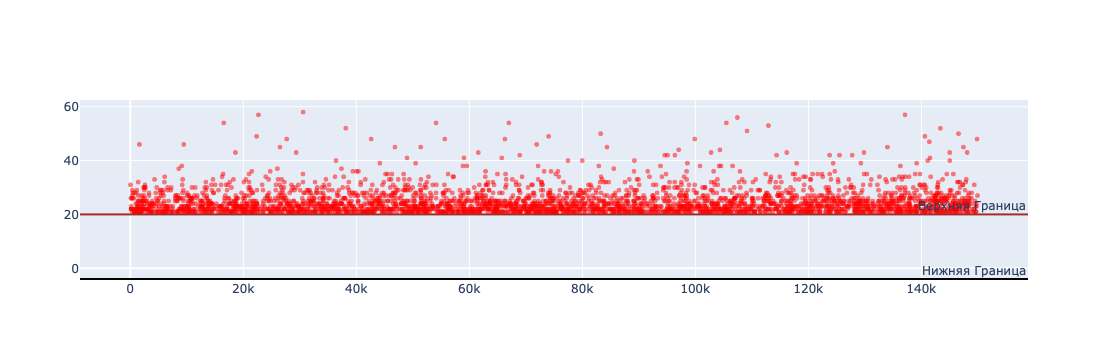

0 209


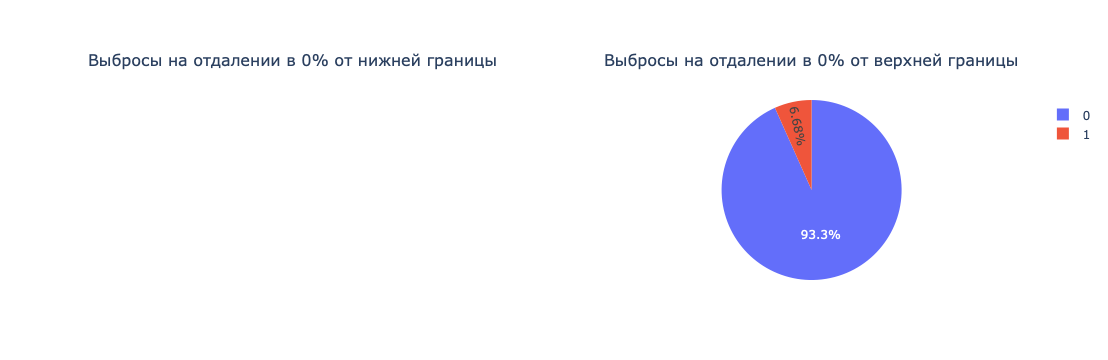

0 66


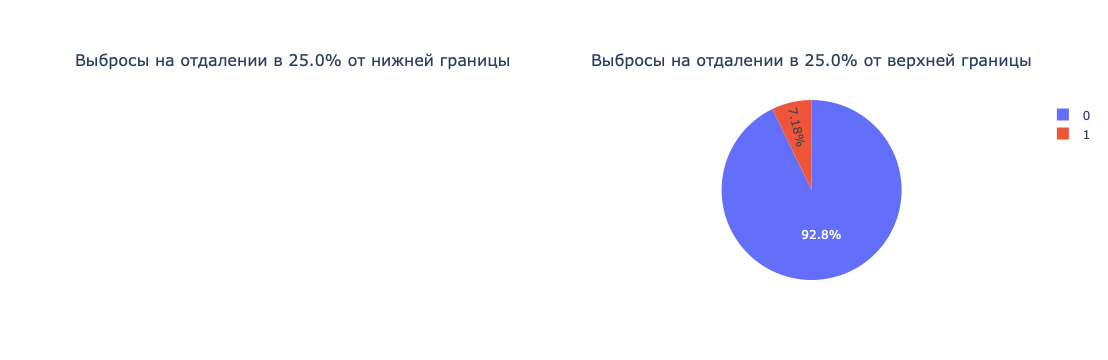

0 21


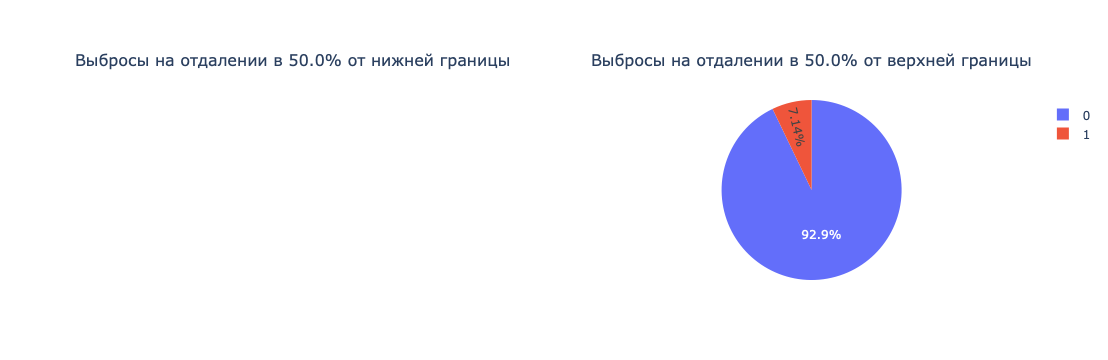

0 10


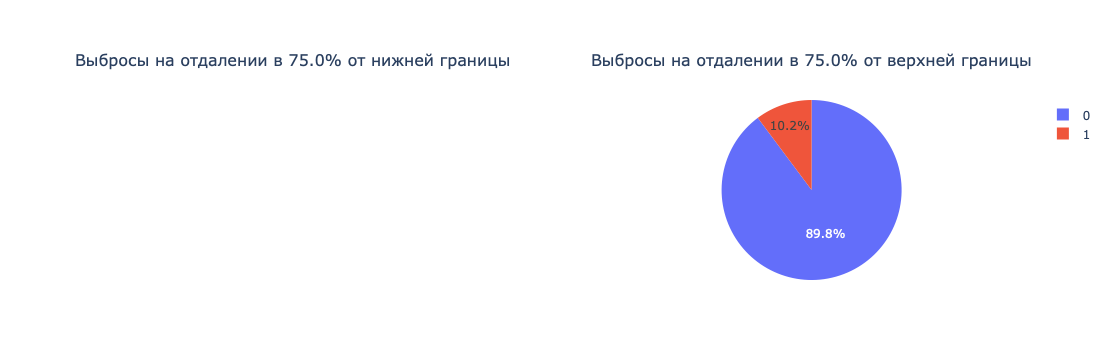

0 6


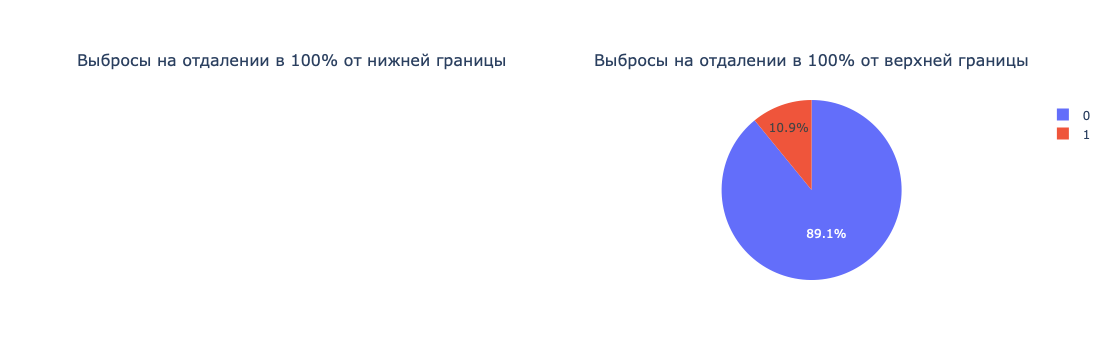

In [82]:
outliers_check(train_data, 'NumberOfOpenCreditLinesAndLoans')

In [83]:
train_data['NumberOfOpenCreditLinesAndLoans'].describe()

count    115784.000000
mean          8.522274
std           5.169618
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [84]:
bins = [0,1,2,3,4,5,10,15,20,
       25,30,60]
interval_check(train_data, 'NumberOfOpenCreditLinesAndLoans', bins)

interval: 0-1
amount: 1474
pos: 0.26526458616010856, neg: 0.7347354138398914
interval: 1-2
amount: 3351
pos: 0.13906296627872278, neg: 0.8609370337212772
interval: 2-3
amount: 4981
pos: 0.09696848022485445, neg: 0.9030315197751455
interval: 3-4
amount: 6763
pos: 0.07984622209078811, neg: 0.9201537779092119
interval: 4-5
amount: 8822
pos: 0.06710496486057584, neg: 0.9328950351394242
interval: 5-10
amount: 49140
pos: 0.057509157509157506, neg: 0.9424908424908425
interval: 10-15
amount: 27548
pos: 0.059532452446638594, neg: 0.9404675475533614
interval: 15-20
amount: 9641
pos: 0.06959858935795042, neg: 0.9304014106420496
interval: 20-25
amount: 2862
pos: 0.07197763801537387, neg: 0.9280223619846262
interval: 25-30
amount: 840
pos: 0.060714285714285714, neg: 0.9392857142857143
interval: 30-60
amount: 362
pos: 0.07734806629834254, neg: 0.9226519337016574


In [85]:
'''
Делается клип до 30, после 30 доля положительного таргета начинает медленно расти, 
но данных уже очень мало для получения статистически обоснованных оценок, потому делается привычный клип до 30 + флаг,
'''

train_data['NumberOfOpenCreditLinesAndLoans_over_30'] = 0.0
train_data.loc[train_data['NumberOfOpenCreditLinesAndLoans'] > 30, 'NumberOfOpenCreditLinesAndLoans_over_30'] = 1.0
train_data['NumberOfOpenCreditLinesAndLoans'] = train_data['NumberOfOpenCreditLinesAndLoans'].clip(0,30).copy()

In [86]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115784 entries, 57837 to 80531
Data columns (total 17 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   SeriousDlqin2yrs                         115784 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines     115784 non-null  float64
 2   age                                      115784 non-null  int64  
 3   DebtRatio                                115784 non-null  float64
 4   MonthlyIncome                            115784 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans          115784 non-null  int64  
 6   NumberRealEstateLoansOrLines             115784 non-null  int64  
 7   NumberOfDependents                       115784 non-null  float64
 8   MonthlyIncomeIsMissing                   115784 non-null  int64  
 9   RevolvingUtilizationOverOne              115784 non-null  float64
 10  DebtPayments                      

### Outliers NumberRealEstateLoansOrLines  

lower_bound: -3.0, upper_bound: 5.0


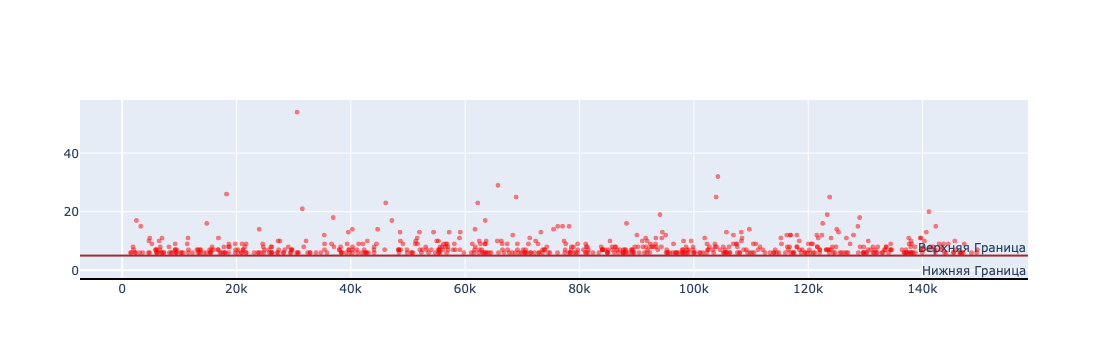

0 107


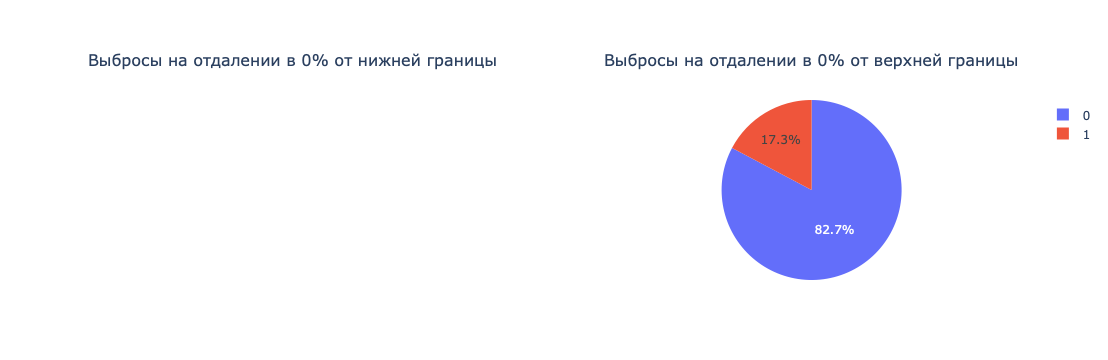

0 71


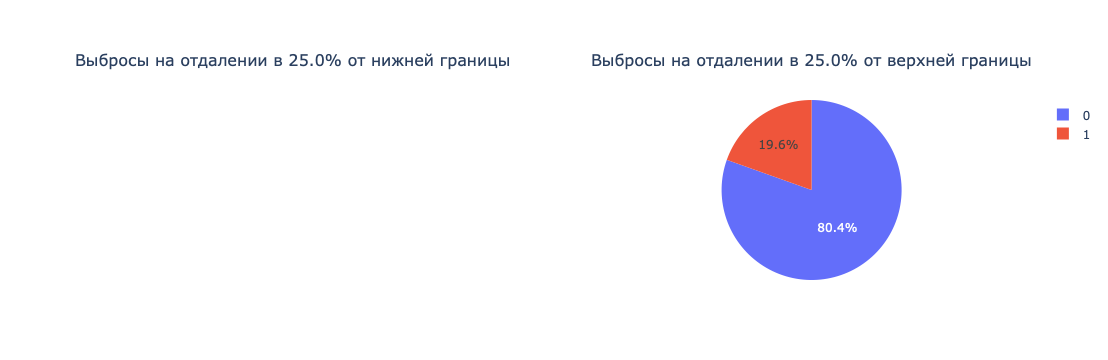

0 46


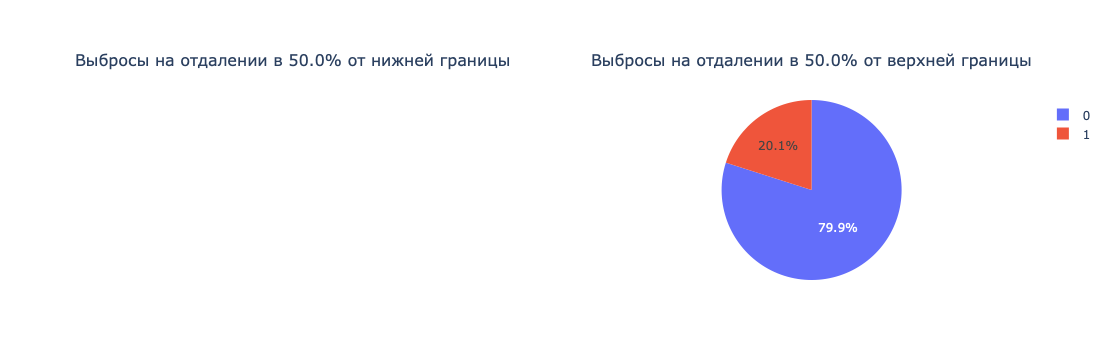

0 27


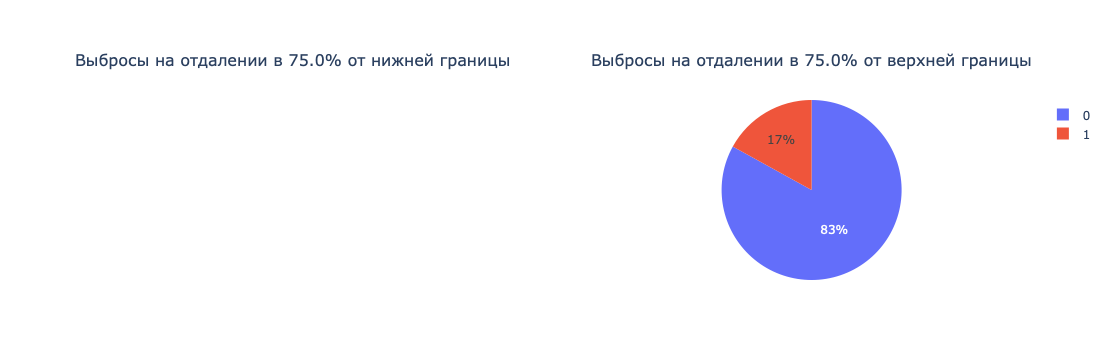

0 13


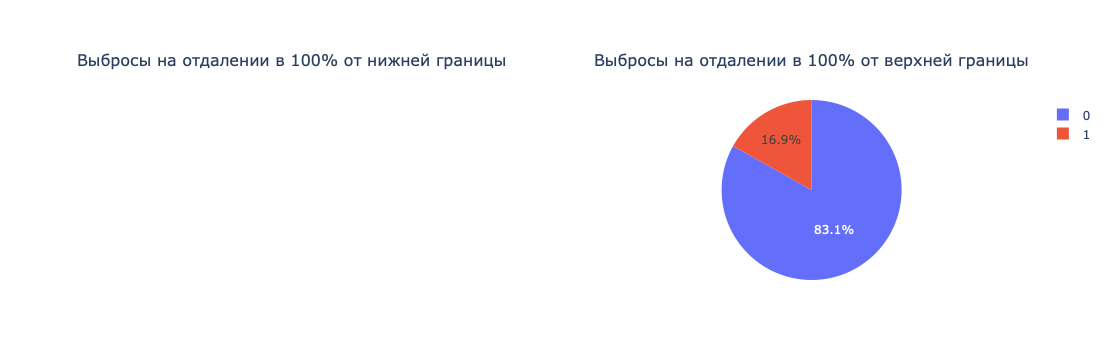

In [87]:
outliers_check(train_data, 'NumberRealEstateLoansOrLines')

In [88]:
train_data['NumberRealEstateLoansOrLines'].describe()

count    115784.000000
mean          1.040576
std           1.137990
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [89]:
bins = [0,1,2,3,4,5,
        6,7,8,9,10,15,20,25,30,35,40,45,50,
        55]
interval_check(train_data, 'NumberRealEstateLoansOrLines', bins)

interval: 0-1
amount: 41909
pos: 0.08740366031162758, neg: 0.9125963396883724
interval: 1-2
amount: 41055
pos: 0.0526367068566557, neg: 0.9473632931433443
interval: 2-3
amount: 24970
pos: 0.055626752102523026, neg: 0.944373247897477
interval: 3-4
amount: 4965
pos: 0.06968781470292044, neg: 0.9303121852970796
interval: 4-5
amount: 1711
pos: 0.09175920514319112, neg: 0.9082407948568089
interval: 5-6
amount: 554
pos: 0.12815884476534295, neg: 0.871841155234657
interval: 6-7
amount: 257
pos: 0.14007782101167315, neg: 0.8599221789883269
interval: 7-8
amount: 134
pos: 0.1865671641791045, neg: 0.8134328358208955
interval: 8-9
amount: 70
pos: 0.2714285714285714, neg: 0.7285714285714286
interval: 9-10
amount: 55
pos: 0.18181818181818182, neg: 0.8181818181818181
interval: 10-15
amount: 77
pos: 0.14285714285714285, neg: 0.8571428571428572
interval: 15-20
amount: 16
pos: 0.25, neg: 0.75
interval: 20-25
amount: 4
pos: 0.0, neg: 1.0
interval: 25-30
amount: 5
pos: 0.4, neg: 0.6
interval: 30-35
amount

In [90]:
train_data[(train_data['NumberRealEstateLoansOrLines']>=20)]

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
141115                 0                              0.715094   47   
30588                  0                              0.003032   53   
46103                  0                              0.003928   76   
18260                  0                              0.635363   61   
31518                  0                              0.060621   38   
104199                 0                              0.010846   60   
65729                  1                              0.036942   43   
62193                  0                              0.002280   73   
68910                  0                              0.297748   44   
123747                 0                              0.985390   51   
103894                 1                              0.507886   44   

        DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
141115   0.671636        20000.0                               30   
30588    5.000000         8000.0                               30   
46103    5.000000            0.0                               27   
18260    0.429449        20000.0                               30   
31518    0.505055        20000.0                               29   
104199   1.041757        20000.0                               30   
65729    0.719174        20000.0                               30   
62193    3.593683        14500.0                               26   
68910    1.237481        12400.0                               30   
123747   0.515205        20000.0                               30   
103894   0.467231        20000.0                               30   

        NumberRealEstateLoansOrLines  NumberOfDependents  \
141115                            20                 2.0   
30588                             54                 0.0   
46103                             23                 0.0   
18260                             26                 1.0   
31518                             21                 0.0   
104199                            32                 0.0   
65729                             29                 0.0   
62193                             23                 0.0   
68910                             25                 2.0   
123747                            25                 1.0   
103894                            25                 0.0   

        MonthlyIncomeIsMissing  RevolvingUtilizationOverOne  DebtPayments  \
141115                       0                          0.0       10000.0   
30588                        0                          0.0       10000.0   
46103                        1                          0.0       10000.0   
18260                        0                          0.0       10000.0   
31518                        0                          0.0       10000.0   
104199                       0                          0.0       10000.0   
65729                        0                          0.0       10000.0   
62193                        0                          0.0       10000.0   
68910                        0                          0.0       10000.0   
123747                       0                          0.0       10000.0   
103894                       0                          0.0       10000.0   

        DebtPayments_over_10k  MonthlyIncome_over_20k  Code96  Code98  \
141115                    1.0                     1.0     0.0     0.0   
30588                     1.0                     0.0     0.0     0.0   
46103                     1.0                     0.0     0.0     0.0   
18260                     1.0                     1.0     0.0     0.0   
31518                     1.0                     1.0     0.0     0.0   
104199                    1.0                     1.0     0.0     0.0   
65729                     1.0                     1.0     0.0     0.0   
62193                     1.0                     0.0     0.0     0.0   
68910                  

In [91]:
'''
более 5 ипотек имеют 1174 лица, доля положительного таргета (риск просрочки) у них заметно выше, но примеров мало, 
те риск скачет от бина к бину, однако остаётся повышенным. Потому делается клип до 5
предварительно клип на 5 и дроп выше 20 ипотек, тк всего 11 примеров и похоже на шум в данных
'''
train_data = train_data[train_data['NumberRealEstateLoansOrLines']<=20].copy()
train_data['NumberRealEstateLoansOrLines_over_5'] = 0.0
train_data.loc[train_data['NumberRealEstateLoansOrLines'] > 5, 'NumberRealEstateLoansOrLines_over_5'] = 1.0

train_data['NumberRealEstateLoansOrLines'] = train_data['NumberRealEstateLoansOrLines'].clip(0,5).copy()

## Correlation Analysis

In [92]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115774 entries, 57837 to 80531
Data columns (total 18 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   SeriousDlqin2yrs                         115774 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines     115774 non-null  float64
 2   age                                      115774 non-null  int64  
 3   DebtRatio                                115774 non-null  float64
 4   MonthlyIncome                            115774 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans          115774 non-null  int64  
 6   NumberRealEstateLoansOrLines             115774 non-null  int64  
 7   NumberOfDependents                       115774 non-null  float64
 8   MonthlyIncomeIsMissing                   115774 non-null  int64  
 9   RevolvingUtilizationOverOne              115774 non-null  float64
 10  DebtPayments                      

<Axes: >

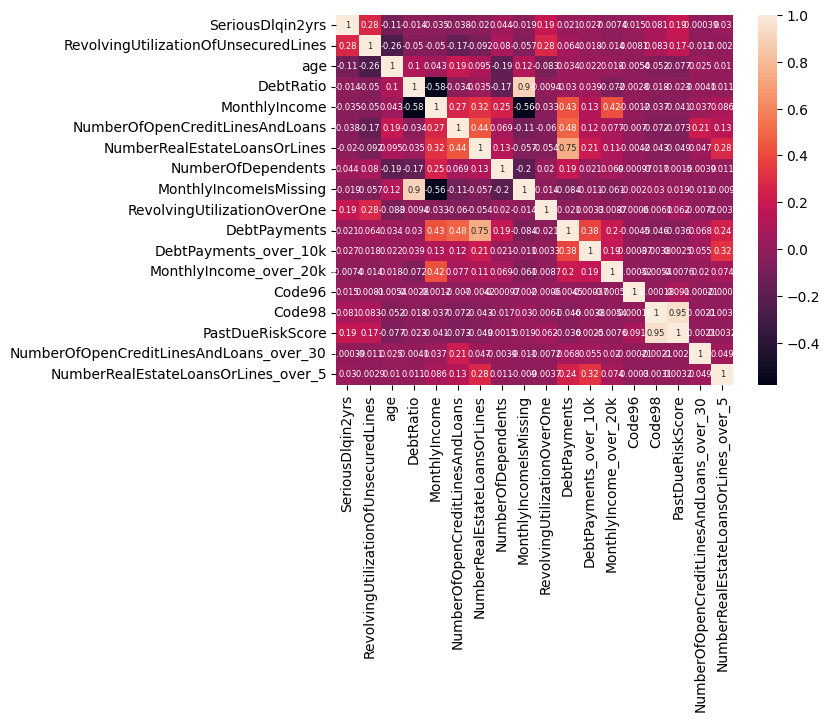

In [93]:
train_data = train_data.astype('float')
import seaborn as sns
sns.heatmap(train_data.corr(), annot = True,annot_kws={'size': 6})

In [94]:
def unique_values_pos_neg_analysis(data, col):
    grps = pd.concat([data[col],train_label], axis = 1).groupby(col).groups
    group_koef = 0
    koef_cnt = 0
    for idx, grp in grps.items():
        grp_len = len(grp)
        pos = sum(train_label.loc[grp])
        neg = grp_len - pos
        if grp_len > 1000 and pos != 0 and neg !=0:
            koef_cnt += 1
            group_koef += grp_len * pos/neg


        print(f'group: {idx}, postive: {pos}, negative: {neg}, grp_len: {grp_len}, pos/neg: {100*pos/neg if (pos!=0 and neg!=0) else 0:.2f}%')
    return group_koef/koef_cnt


In [95]:
unique_values_pos_neg_analysis(train_data,'NumberOfOpenCreditLinesAndLoans')

group: 0.0, postive: 391, negative: 1083, grp_len: 1474, pos/neg: 36.10%
group: 1.0, postive: 466, negative: 2885, grp_len: 3351, pos/neg: 16.15%
group: 2.0, postive: 483, negative: 4498, grp_len: 4981, pos/neg: 10.74%
group: 3.0, postive: 540, negative: 6223, grp_len: 6763, pos/neg: 8.68%
group: 4.0, postive: 592, negative: 8230, grp_len: 8822, pos/neg: 7.19%
group: 5.0, postive: 636, negative: 9225, grp_len: 9861, pos/neg: 6.89%
group: 6.0, postive: 582, negative: 9876, grp_len: 10458, pos/neg: 5.89%
group: 7.0, postive: 605, negative: 9632, grp_len: 10237, pos/neg: 6.28%
group: 8.0, postive: 474, negative: 9288, grp_len: 9762, pos/neg: 5.10%
group: 9.0, postive: 529, negative: 8293, grp_len: 8822, pos/neg: 6.38%
group: 10.0, postive: 460, negative: 7076, grp_len: 7536, pos/neg: 6.50%
group: 11.0, postive: 369, negative: 6101, grp_len: 6470, pos/neg: 6.05%
group: 12.0, postive: 347, negative: 5154, grp_len: 5501, pos/neg: 6.73%
group: 13.0, postive: 236, negative: 4215, grp_len: 4451

414.78134031004663

In [96]:
unique_values_pos_neg_analysis(train_data,'NumberRealEstateLoansOrLines')

group: 0.0, postive: 3663, negative: 38246, grp_len: 41909, pos/neg: 9.58%
group: 1.0, postive: 2161, negative: 38894, grp_len: 41055, pos/neg: 5.56%
group: 2.0, postive: 1389, negative: 23581, grp_len: 24970, pos/neg: 5.89%
group: 3.0, postive: 346, negative: 4619, grp_len: 4965, pos/neg: 7.49%
group: 4.0, postive: 157, negative: 1554, grp_len: 1711, pos/neg: 10.10%
group: 5.0, postive: 176, negative: 988, grp_len: 1164, pos/neg: 17.81%


1419.6399174909784

                                    feature       VIF
0      RevolvingUtilizationOfUnsecuredLines  1.971808
1                                       age  6.750614
2                             MonthlyIncome  5.287441
3           NumberOfOpenCreditLinesAndLoans  5.531945
4              NumberRealEstateLoansOrLines  5.064188
5                        NumberOfDependents  1.578258
6                    MonthlyIncomeIsMissing  1.988142
7               RevolvingUtilizationOverOne  1.108676
8                              DebtPayments  7.274877
9                     DebtPayments_over_10k  1.347886
10                   MonthlyIncome_over_20k  1.329861
11                                   Code96  1.008408
12                         PastDueRiskScore  1.064397
13  NumberOfOpenCreditLinesAndLoans_over_30  1.053265
14      NumberRealEstateLoansOrLines_over_5  1.193029


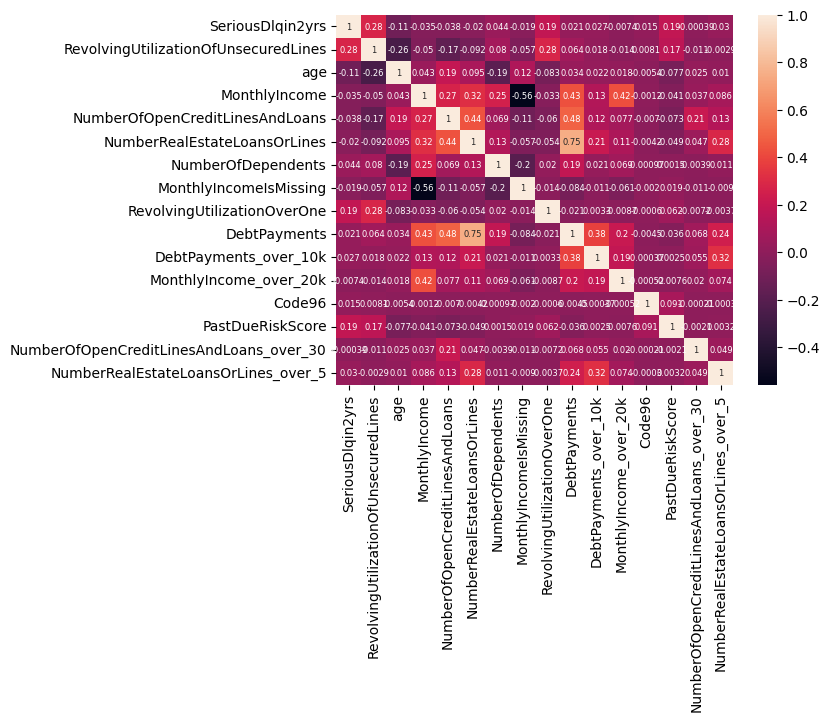

In [97]:
train_data_no_label = train_data.drop(columns = ['DebtRatio', 
                                                 # 'NumberOfOpenCreditLinesAndLoans',
                                                 # 'NumberRealEstateLoansOrLines', 
                                                 'Code98'])

# import seaborn as sns
# sns.heatmap(train_data_no_label.corr(), annot = True,annot_kws={'size': 6})

# vif_data = pd.DataFrame()
# vif_data['feature'] = train_data_no_label.columns
# vif_data['VIF'] = [variance_inflation_factor(train_data_no_label.values, i) for i in range(train_data_no_label.shape[1])]
# print(vif_data)

def vif_and_corr_check(df):
    
    import seaborn as sns
    sns.heatmap(df.corr(), annot = True,annot_kws={'size': 6})

    from statsmodels.stats.outliers_influence import variance_inflation_factor
    df_no_label = df.drop(columns = ['SeriousDlqin2yrs'])
    vif_data = pd.DataFrame()
    vif_data['feature'] = df_no_label.columns
    vif_data['VIF'] = [variance_inflation_factor(df_no_label.values, i) for i in range(df_no_label.shape[1])]
    print(vif_data)
    
vif_and_corr_check(train_data_no_label)

In [98]:
'''
age, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, 
NumberRealEstateLoansOrLines, DebtPayments, 
Code98, PastDueRiskScore  
У всех высокая мультиколлинеарность

Code98 - коррелирует с PastDueRiskScore, потому дропаем Code98, эти флаги нужны были только для Kaggle скора, в проде их не будет
для остальных попробуем биннинг
'''

'\nage, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, \nNumberRealEstateLoansOrLines, DebtPayments, \nCode98, PastDueRiskScore  \nУ всех высокая мультиколлинеарность\n\nCode98 - коррелирует с PastDueRiskScore, потому дропаем Code98, эти флаги нужны были только для Kaggle скора, в проде их не будет\nдля остальных попробуем биннинг\n'

### Биннинг 

In [99]:
# Биннинг

# NumberOfOpenCreditLinesAndLoans
train_data['ConsumerCredit_Group'] = pd.cut(train_data['NumberOfOpenCreditLinesAndLoans'], 
                                bins = [0,1, 2,6,15,31], 
                                labels=[
                                    '0_loans',
                                    '1_loans',
                                    '2-5_loans',
                                    '6-14_loans',
                                    '16-30_loans'
                                ])
consumer_dummy = pd.get_dummies(train_data['ConsumerCredit_Group'], prefix='Consumer', drop_first = False).astype('float')

train_data['RealEstateLoans_Group'] = pd.cut(train_data['NumberRealEstateLoansOrLines'],
                                   bins=[-1, 0, 3,100], 
                                   labels= [
                                            '0_loans',      
                                            '1-3_loans',    
                                            '4+_loans',    
                                            ])
estate_dummy = pd.get_dummies(train_data['RealEstateLoans_Group'], prefix='RealEstateLoans', drop_first = False).astype('float')

train_data = pd.concat([train_data, consumer_dummy, estate_dummy], axis = 1).copy()
train_data = train_data.drop(columns = ['ConsumerCredit_Group', 
                                        'RealEstateLoans_Group']).copy()

# За базовые категории взяты Consumer_6-14_loans тк является самой частой и с наименьшим риском, те за базу взять "идеальный клиент"
# И RealEstateLoans_0_loans, тк является самой частой категорией + сравнение относительно нуля
train_data = train_data.drop(columns = ['Consumer_6-14_loans',  
                                        'RealEstateLoans_0_loans']).copy()

# age
# age_bins = [18, 31, 41, 51, 61, 71, 81]
# age_bins_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80']
# train_data['age_bins'] = pd.cut(
#     x = train_data['age'],
#     bins = age_bins,
#     labels = age_bins_labels,
#     right = False,
#     include_lowest = True)
# train_data['age_bins'] = train_data['age_bins'].astype('category')

# test_data['age_bins'] = pd.cut(
#     x = test_data['age'],
#     bins = age_bins,
#     labels = age_bins_labels,
#     right = False,
#     include_lowest = True)
# test_data['age_bins'] = test_data['age_bins'].astype('category')


train_data

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines   age  \
57837                0.0                              0.114987  62.0   
132896               0.0                              0.008705  73.0   
27982                0.0                              0.214501  32.0   
37853                0.0                              1.000000  60.0   
103814               0.0                              0.230493  60.0   
...                  ...                                   ...   ...   
18049                0.0                              0.004136  41.0   
3896                 0.0                              0.000000  49.0   
109981               0.0                              1.000000  80.0   
74355                0.0                              0.925187  63.0   
80531                0.0                              1.000000  41.0   

        DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
57837    5.000000            0.0                              5.0   
132896   0.498553         3800.0                              6.0   
27982    0.211999         3716.0                              8.0   
37853    5.000000            0.0                              5.0   
103814   1.017328         3000.0                             10.0   
...           ...            ...                              ...   
18049    0.472323         7695.0                              9.0   
3896     0.322344         8583.0                             18.0   
109981   5.000000            0.0                              0.0   
74355    0.389974         1535.0                              2.0   
80531    5.000000            0.0                              3.0   

        NumberRealEstateLoansOrLines  NumberOfDependents  \
57837                            1.0                 2.0   
132896                           1.0                 0.0   
27982                            0.0                 2.0   
37853                            0.0                 0.0   
103814                           1.0                 0.0   
...                              ...                 ...   
18049                            2.0                 0.0   
3896                             1.0                 1.0   
109981                           0.0                 0.0   
74355                            0.0                 0.0   
80531                            0.0                 0.0   

        MonthlyIncomeIsMissing  RevolvingUtilizationOverOne  ...  Code98  \
57837                      1.0                          0.0  ...     0.0   
132896                     0.0                          0.0  ...     0.0   
27982                      0.0                          0.0  ...     0.0   
37853                      1.0                          0.0  ...     0.0   
103814                     0.0                          0.0  ...     0.0   
...                        ...                          ...  ...     ...   
18049                      0.0                          0.0  ...     0.0   
3896                       0.0                          0.0  ...     0.0   
109981                     1.0                          0.0  ...     0.0   
74355                      0.0                          0.0  ...     0.0   
80531                      1.0                          0.0  ...     0.0   

        PastDueRiskScore  NumberOfOpenCreditLinesAndLoans_over_30  \
57837                0.0                                      0.0   
132896               0.0                                      0.0   
27982                0.0                                      0.0   
37853                0.0                                      0.0   
103814               0.0                                      0.0   
...                  ...                                      ...   
18049                0.0                                      0.0   
3896                 0.0                                      0.0   
109981               0.0                                   

                                    feature        VIF
0      RevolvingUtilizationOfUnsecuredLines   2.262406
1                                       age   5.903644
2                                 DebtRatio   2.696129
3                             MonthlyIncome   6.080345
4                        NumberOfDependents   1.587517
5               RevolvingUtilizationOverOne   1.141719
6                              DebtPayments   4.671050
7                     DebtPayments_over_10k   1.315332
8                    MonthlyIncome_over_20k   1.327417
9                                    Code96   1.114391
10                                   Code98  13.640791
11                         PastDueRiskScore  14.327601
12  NumberOfOpenCreditLinesAndLoans_over_30   1.029373
13      NumberRealEstateLoansOrLines_over_5   1.336284
14                         Consumer_0_loans   1.144159
15                         Consumer_1_loans   1.136448
16                       Consumer_2-5_loans   1.617854
17        

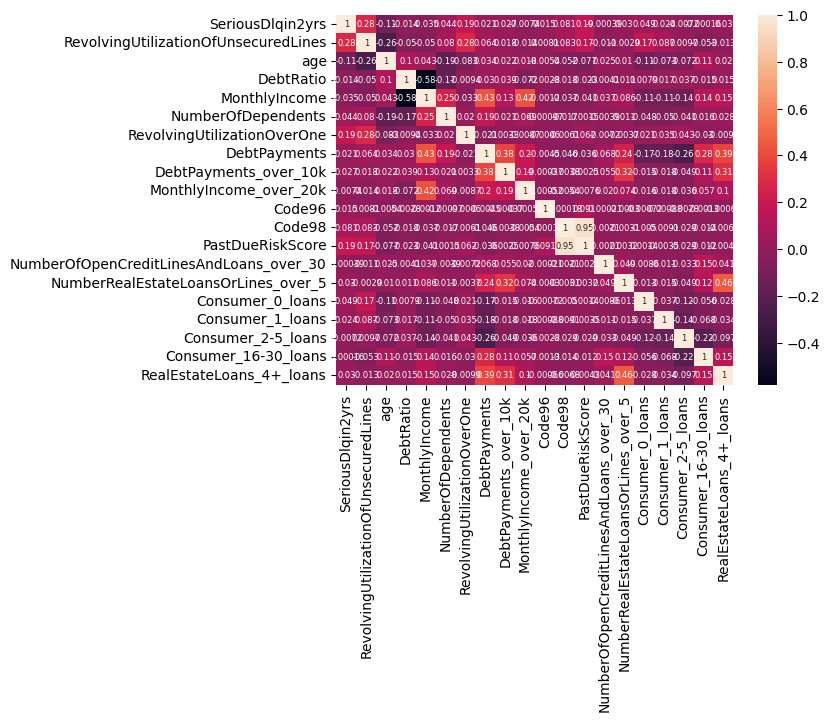

In [113]:
train_data_no_label = train_data.drop(columns = [ 
                                                 'NumberOfOpenCreditLinesAndLoans',
                                                 'NumberRealEstateLoansOrLines', 
                                                 #'MonthlyIncome_over_20k', 
                                                 #'NumberRealEstateLoansOrLines_over_5',
                                                 'RealEstateLoans_1-3_loans',
                                                 #'DebtRatio',
                                                 'MonthlyIncomeIsMissing',
                                                 #'Code98'
])
vif_and_corr_check(train_data_no_label)

In [114]:
bins = [18, 30, 40,50,60,70,80,81]
interval_check(train_data, 'age', bins)

interval: 18-30
amount: 7060
pos: 0.11373937677053825, neg: 0.8862606232294618
interval: 30-40
amount: 18478
pos: 0.099686113215716, neg: 0.900313886784284
interval: 40-50
amount: 27363
pos: 0.08303183130504696, neg: 0.916968168694953
interval: 50-60
amount: 28241
pos: 0.06518890974115647, neg: 0.9348110902588436
interval: 60-70
amount: 23054
pos: 0.03686995749110784, neg: 0.9631300425088921
interval: 70-80
amount: 10861
pos: 0.024675444250069054, neg: 0.9753245557499309
interval: 80-81
amount: 717
pos: 0.022315202231520222, neg: 0.9776847977684798


In [115]:
# from sklearn.inspection import permutation_importance 
# from sklearn.ensemble import RandomForestClassifier

# importance_df = train_data.drop(columns = ['SeriousDlqin2yrs', 
#                                       'age', 
#                                       'DebtPayments', 
#                                       #'DebtPaymentsClipped', 
#                                       'DebtPayments_below_3k',
#                                       'DebtPayments_between_3k_9k',
#                                       #'DebtPayments_over_9k'
#                                      ])

# rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, class_weight = 'balanced').fit(importance_df, train_data['SeriousDlqin2yrs'])
# perm_result = permutation_importance (rfc, 
#                                       X = importance_df, 
#                                       y = train_data['SeriousDlqin2yrs'],
#                                       n_repeats = 5,
#                                       random_state = 42)
# print('Permutation Importance')
# for feature, importance_mean, importance_std in zip(importance_df.columns,
#                                                                    perm_result.importances_mean,
#                                                                    perm_result.importances_std):
#     print(f'{feature}: {importance_mean} +- {importance_std}')

In [116]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance


importance_df = train_data.drop(columns = ['SeriousDlqin2yrs',
                                           'NumberOfOpenCreditLinesAndLoans',
                                                 'NumberRealEstateLoansOrLines', 
                                           'RealEstateLoans_1-3_loans',
                                                 #'DebtRatio',
                                                 'MonthlyIncomeIsMissing',
                                                 'Code98',
                                                   'Code96',
                                                    'MonthlyIncome_over_20k',
                                                    'Consumer_0_loans',
                                                    'NumberOfOpenCreditLinesAndLoans_over_30'
                                                   ])
importance_df = train_data_no_label.drop(columns = ['SeriousDlqin2yrs'])
X_train, X_val, y_train, y_val = train_test_split(
    importance_df,
    train_data['SeriousDlqin2yrs'],
    test_size=0.3,
    random_state=42,
    stratify = train_data['SeriousDlqin2yrs']
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns = X_val.columns, index = X_val.index)

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
results = {}

models = {
    'LogisticRegression': LogisticRegression(
        max_iter=1000,
        class_weight = 'balanced',
        random_state = 42   
    ),
    
    'RandomForest': RandomForestClassifier(
        n_estimators=100, 
        max_depth=5,
        class_weight = 'balanced',
        random_state = 42
    ),
    
    'XGBoost': XGBClassifier(
        n_estimators=100, 
        max_depth=3,
        scale_pos_weight = scale_pos_weight,
        eval_metric = 'logloss',
        random_state = 42
    )
}


print("ROC-AUC:")
for model_name, model in models.items():
    if model_name == 'LogisticRegression':
        X_train_use = X_train_scaled_df
        X_val_use = X_val_scaled_df
        
    else:
        X_train_use = X_train
        X_val_use = X_val
        
    model.fit(X_train_use, y_train)
    y_pred = model.predict_proba(X_val_use)[:,1]
    roc_auc = roc_auc_score(y_val, y_pred)
    results[model_name] = roc_auc
    print(f'{model_name}: {roc_auc:.4f}')

 # Permutation Importance

importance_xgb = XGBClassifier(
        n_estimators=100, 
        max_depth=3,
        scale_pos_weight = scale_pos_weight,
        eval_metric = 'logloss',
        random_state = 42)

importance_xgb.fit(X_train, y_train)
    

perm_result = permutation_importance(
    importance_xgb,
    X_val, y_val,
    n_repeats = 10,
    scoring = 'roc_auc',
    random_state = 42)

perm_importance_df = pd.DataFrame({
    'feature': X_val.columns,
    'perm_importance': perm_result.importances_mean,
    'perm_std': perm_result.importances_std
}).sort_values('perm_importance', ascending = False)

print('Permutation Importance')
print(perm_importance_df)

ROC-AUC:
LogisticRegression: 0.8525
RandomForest: 0.8549
XGBoost: 0.8583
Permutation Importance
                                    feature  perm_importance  perm_std
11                         PastDueRiskScore         0.121038  0.001161
0      RevolvingUtilizationOfUnsecuredLines         0.067643  0.002268
6                              DebtPayments         0.014712  0.000773
1                                       age         0.010217  0.001118
2                                 DebtRatio         0.009048  0.001167
3                             MonthlyIncome         0.005460  0.001138
16                       Consumer_2-5_loans         0.001852  0.000426
17                     Consumer_16-30_loans         0.001187  0.000381
15                         Consumer_1_loans         0.000993  0.000419
18                 RealEstateLoans_4+_loans         0.000875  0.000170
4                        NumberOfDependents         0.000464  0.000216
7                     DebtPayments_over_10k         

In [104]:
importance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115774 entries, 57837 to 80531
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  115774 non-null  float64
 1   age                                   115774 non-null  float64
 2   DebtRatio                             115774 non-null  float64
 3   MonthlyIncome                         115774 non-null  float64
 4   NumberOfDependents                    115774 non-null  float64
 5   RevolvingUtilizationOverOne           115774 non-null  float64
 6   DebtPayments                          115774 non-null  float64
 7   DebtPayments_over_10k                 115774 non-null  float64
 8   PastDueRiskScore                      115774 non-null  float64
 9   NumberRealEstateLoansOrLines_over_5   115774 non-null  float64
 10  Consumer_1_loans                      115774 non-null  float64
 11  Co

## Scaling Data

In [105]:
# train_data.nunique()

In [106]:
from sklearn.preprocessing import StandardScaler

# boolean_columns = [
#     'Consumer_0-1_loans',
#     'Consumer_2-3_loans',
#     'Mortgage_1-3_loans',
#     'age_18-30',
#     'age_31-40',
#     'age_41-50',
#     'age_51-60',
#     'age_61-70',
#     'age_71-80'
#     'DebtPayments_over_9k']

boolean_columns = [
    'Consumer_0-1_loans',
    'Consumer_2-3_loans',
    'Mortgage_1-3_loans',
    'DebtPayments_over_9k']

scaler = StandardScaler()
scaler_train = scaler.fit(train_data.drop(boolean_columns, axis = 1))
train_data_scaled = scaler_train.transform(train_data.drop(boolean_columns, axis = 1))
test_data_scaled = scaler_train.transform(test_data.drop(boolean_columns, axis = 1))

train_data_scaled_df = pd.concat([pd.DataFrame(train_data_scaled),
                                  train_data[boolean_columns].reset_index(drop = True)], axis = 1)

train_data_scaled_df.columns = train_data.columns

test_data_scaled_df = pd.concat([pd.DataFrame(test_data_scaled),
                                  test_data[boolean_columns].reset_index(drop = True)], axis = 1)

test_data_scaled_df.columns = test_data.columns

train_data_scaled_df

In [107]:
# train_data_scaled_df.to_csv(FOLDER_PATH + 'data/train_VIF_EDA_cont_age_v2.csv')
# test_data_scaled_df.to_csv(FOLDER_PATH + 'data/test_VIF_EDA_cont_age_v2.csv')
# train_label.to_csv(FOLDER_PATH + '/data/train_label.csv')